# Tutorial 8: TIMM Models for Image Classification

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch8-2024Fall_timm.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch8-2024Fall_timm.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!pip3 install torch torchvision

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

Start a local colab container: `docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`, copy the link output from the terminal. In Colab, select connect to local runtime and paste the link: http://127.0.0.1:9000/?token=40b8f133089f7a5d71d105195c40f9bba5dc40472320aede

In [1]:
!python -V

Python 3.10.12


In [2]:
!nvidia-smi #check GPU

Sun Aug 18 17:12:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN V                 Off | 00000000:01:00.0  On |                  N/A |
| 29%   44C    P2              28W / 250W |   1438MiB / 12288MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.0+cu121


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2914, 0.3978, 0.5348],
        [0.7325, 0.3440, 0.1886],
        [0.7743, 0.0425, 0.4384],
        [0.9441, 0.4001, 0.5277],
        [0.1643, 0.6068, 0.2210]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.0+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  NVIDIA TITAN V
Device properties: _CudaDeviceProperties(name='NVIDIA TITAN V', major=7, minor=0, total_memory=12023MB, multi_processor_count=80)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/local/nvidia/lib:/usr/local/nvidia/lib64


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Load Google Drive Folder for Colab

In Colab, add the following to load google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
filename = os.path.join("/content/gdrive/My Drive/data", filename)

Check the following tutorial regarding the external data for Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd

## Download Flower dataset

We'll be using PyTorch's ImageFolder class which makes it very easy to load data from a directory.
the root folder for training is flower_photos/train/ and the classes are the names of flower types. root/class_1/xxz.png

root/class_2/123.png

Download the flower data from this link: https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip

In [ ]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip

--2024-08-13 05:02:09--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.229, 52.216.40.120, 52.217.98.70, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229734282 (219M) [application/zip]
Saving to: ‘flower-photos.zip’

flower-photos.zip   100%[===================>] 219.09M  14.4MB/s    in 17s     

2024-08-13 05:02:27 (12.9 MB/s) - ‘flower-photos.zip’ saved [229734282/229734282]



In [ ]:
!unzip ./flower-photos.zip

Archive:  ./flower-photos.zip
   creating: flower_photos/
  inflating: flower_photos/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/flower_photos/
  inflating: __MACOSX/flower_photos/._.DS_Store  
  inflating: flower_photos/LICENSE.txt  
   creating: flower_photos/test/
  inflating: flower_photos/test/.DS_Store  
   creating: __MACOSX/flower_photos/test/
  inflating: __MACOSX/flower_photos/test/._.DS_Store  
   creating: flower_photos/test/daisy/
  inflating: flower_photos/test/daisy/14332947164_9b13513c71_m.jpg  
  inflating: flower_photos/test/daisy/14333681205_a07c9f1752_m.jpg  
  inflating: flower_photos/test/daisy/14350958832_29bdd3a254.jpg  
  inflating: flower_photos/test/daisy/14354051035_1037b30421_n.jpg  
  inflating: flower_photos/test/daisy/14372713423_61e2daae88.jpg  
  inflating: flower_photos/test/daisy/14399435971_ea5868c792.jpg  
  inflating: flower_photos/test/daisy/14402451388_56545a374a_n.jpg  
  inflating: flower_photos/test/daisy/14421389519_d5fd353eb4.j

## Download Oxford-IIT Pet Dataset
37 category pet dataset with roughly 200 images for each class-

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -P pets

In [ ]:
!tar zxf pets/images.tar.gz -C pets

In [ ]:
!ls pets/images

In [ ]:
from pathlib import Path
pets_path = Path('pets/images')
pets_image_paths = list(pets_path.iterdir())

In [ ]:
pets_image_paths

## Download Imagenette
a subset of 10 easily classified classes from Imagenet.

In [9]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz -P imagenette

--2024-08-18 17:13:26--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.204.0, 54.231.200.192, 52.216.176.237, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.204.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341663724 (326M) [application/x-tar]
Saving to: ‘imagenette/imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.83M  8.52MB/s    in 48s     

2024-08-18 17:14:15 (6.72 MB/s) - ‘imagenette/imagenette2-320.tgz’ saved [341663724/341663724]



In [10]:
!ls

imagenette  sample_data


In [11]:
!tar zxf imagenette/imagenette2-320.tgz -C imagenette

In [ ]:
!ls imagenette/imagenette2-320

noisy_imagenette.csv  train  val


In [12]:
import pandas as pd
from pathlib import Path
dataset_path = Path('imagenette/imagenette2-320/train')
img_folder_paths = [folder for folder in dataset_path.iterdir() if folder.is_dir()]
# Display the names of the folders using a Pandas DataFrame
pd.DataFrame({"Image Folder": [folder.name for folder in img_folder_paths]})


Image Folder
0    n03394916
1    n03417042
2    n03445777
3    n03028079
4    n03888257
5    n03425413
6    n03000684
7    n01440764
8    n02102040
9    n02979186

In [13]:
class_file_paths = [folder for folder in img_folder_paths]

In [14]:
class_file_paths

[PosixPath('imagenette/imagenette2-320/train/n03394916'),
 PosixPath('imagenette/imagenette2-320/train/n03417042'),
 PosixPath('imagenette/imagenette2-320/train/n03445777'),
 PosixPath('imagenette/imagenette2-320/train/n03028079'),
 PosixPath('imagenette/imagenette2-320/train/n03888257'),
 PosixPath('imagenette/imagenette2-320/train/n03425413'),
 PosixPath('imagenette/imagenette2-320/train/n03000684'),
 PosixPath('imagenette/imagenette2-320/train/n01440764'),
 PosixPath('imagenette/imagenette2-320/train/n02102040'),
 PosixPath('imagenette/imagenette2-320/train/n02979186')]

### Map ImageNet WordNet IDs to label

Download ImageNet WordNet IDs to label list from :https://github.com/Evolving-AI-Lab/ppgn/blob/master/misc/map_clsloc.txt

In [16]:
# use pandas to load .txt file
import pandas as pd
df = pd.read_csv('map_clsloc.txt', delimiter=' ', header=None, names=['WordNetID','ID', 'description'])
df


WordNetID    ID         description
0    n02119789     1             kit_fox
1    n02100735     2      English_setter
2    n02110185     3      Siberian_husky
3    n02096294     4  Australian_terrier
4    n02102040     5    English_springer
..         ...   ...                 ...
995  n03063599   996          coffee_mug
996  n04116512   997       rubber_eraser
997  n04325704   998               stole
998  n07831146   999           carbonara
999  n03255030  1000            dumbbell

[1000 rows x 3 columns]

In [17]:
# use the WordNetID as the key
id_to_desc = dict(zip(df['WordNetID'], df['description']))
id_to_desc


{'n02119789': 'kit_fox',
 'n02100735': 'English_setter',
 'n02110185': 'Siberian_husky',
 'n02096294': 'Australian_terrier',
 'n02102040': 'English_springer',
 'n02066245': 'grey_whale',
 'n02509815': 'lesser_panda',
 'n02124075': 'Egyptian_cat',
 'n02417914': 'ibex',
 'n02123394': 'Persian_cat',
 'n02125311': 'cougar',
 'n02423022': 'gazelle',
 'n02346627': 'porcupine',
 'n02077923': 'sea_lion',
 'n02110063': 'malamute',
 'n02447366': 'badger',
 'n02109047': 'Great_Dane',
 'n02089867': 'Walker_hound',
 'n02102177': 'Welsh_springer_spaniel',
 'n02091134': 'whippet',
 'n02092002': 'Scottish_deerhound',
 'n02071294': 'killer_whale',
 'n02442845': 'mink',
 'n02504458': 'African_elephant',
 'n02092339': 'Weimaraner',
 'n02098105': 'soft-coated_wheaten_terrier',
 'n02096437': 'Dandie_Dinmont',
 'n02114712': 'red_wolf',
 'n02105641': 'Old_English_sheepdog',
 'n02128925': 'jaguar',
 'n02091635': 'otterhound',
 'n02088466': 'bloodhound',
 'n02096051': 'Airedale',
 'n02117135': 'hyena',
 'n0213

In [37]:
id_to_desc['n03255030']

'dumbbell'

In [18]:
import os
test_dir = "imagenette/imagenette2-320/val"
classes = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]
classes.sort()

In [39]:
classes

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

In [19]:
class_names = [id_to_desc[class_name] for class_name in classes]
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [ ]:
!ls imagenette/imagenette2-320/val/n03417042

ILSVRC2012_val_00002210.JPEG  n03417042_17862.JPEG  n03417042_2812.JPEG   n03417042_581.JPEG
ILSVRC2012_val_00006922.JPEG  n03417042_1790.JPEG   n03417042_2822.JPEG   n03417042_5852.JPEG
ILSVRC2012_val_00008430.JPEG  n03417042_17911.JPEG  n03417042_28261.JPEG  n03417042_5920.JPEG
ILSVRC2012_val_00022172.JPEG  n03417042_18042.JPEG  n03417042_28400.JPEG  n03417042_5952.JPEG
ILSVRC2012_val_00024560.JPEG  n03417042_18072.JPEG  n03417042_28552.JPEG  n03417042_6050.JPEG
ILSVRC2012_val_00027110.JPEG  n03417042_18152.JPEG  n03417042_28600.JPEG  n03417042_6081.JPEG
ILSVRC2012_val_00027150.JPEG  n03417042_18232.JPEG  n03417042_28610.JPEG  n03417042_6130.JPEG
ILSVRC2012_val_00028190.JPEG  n03417042_1840.JPEG   n03417042_28700.JPEG  n03417042_620.JPEG
ILSVRC2012_val_00032800.JPEG  n03417042_1841.JPEG   n03417042_28702.JPEG  n03417042_6241.JPEG
ILSVRC2012_val_00033842.JPEG  n03417042_18450.JPEG  n03417042_28742.JPEG  n03417042_6250.JPEG
ILSVRC2012_val_00034001.JPEG  n03417042_1850.JPEG   n03417042_

In [8]:
!pwd

/content


## TIMM Datasets <a class="anchor" id="datasets"></a>

timm provides a number of useful utilities for working with different types of datasets. The easiest way to get started is using the `create_dataset` function, which will create an appropriate dataset for us.

`create_dataset` always expects two arguments:
- `name`: the name of the dataset that we want to load
- `root`: the root folder of the dataset on the local file system

but has additional keyword arguments that can be used to specify options such as whether we would like to load the training or validation set.

We can also use `create_dataset`to load data from several different places:

- datasets available in [TorchVision](https://pytorch.org/vision/0.11/datasets.html)
- datasets available in [TensorFlow datasets](https://www.tensorflow.org/datasets)
- datasets stored in local folders

Source code of `creat_dataset`: https://github.com/huggingface/pytorch-image-models/blob/main/timm/data/dataset_factory.py

```bash
def create_dataset(
        name: str, #dataset name, empty is okay for folder based datasets
        root: Optional[str] = None, #root folder of dataset (all)
        split: str = 'validation',
        search_split: bool = True,
        class_map: dict = None,
        load_bytes: bool = False,
        is_training: bool = False,
        download: bool = False,
        batch_size: int = 1,
        num_samples: Optional[int] = None,
        seed: int = 42,
        repeats: int = 0,
        input_img_mode: str = 'RGB',
        **kwargs,
):
```

In parentheses after each arg are the type of dataset supported for each arg, one of:
      
      * folder - default, timm folder (or tar) based ImageDataset
      * torch - torchvision based datasets
      * HFDS - Hugging Face Datasets
      * TFDS - Tensorflow-datasets wrapper in IterabeDataset interface via IterableImageDataset
      * WDS - Webdataset
      * all - any of the above

In [6]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [7]:
import timm
from timm.data import create_dataset

### Loading datasets from TorchVision <a class="anchor" id="datasets-torchvision"></a>

To load a dataset included with TorchVision, we simply specify the prefix `torch/` before the name of the dataset that we wish to load. If the data doesn't exist on the file system, we can download this data by setting `download=True`. Additionally, here we are specifying that we would like to load the training dataset with the `split` argument.

In [ ]:
ds = create_dataset('torch/cifar10', 'cifar10', download=True, split='train')

100%|██████████| 170498071/170498071 [00:03<00:00, 48574355.24it/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10


In [ ]:
ds, type(ds)

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: cifar10
     Split: Train,
 torchvision.datasets.cifar.CIFAR10)

Inspecting the type, we can see that this is a TorchVision dataset. We can access this as usual with an index:

In [ ]:
ds[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [ ]:
image, label = ds[0]

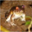

In [ ]:
image

### Loading datasets from TensorFlow Datasets <a class="anchor" id="datasets-tf"></a>

In addition to the datasets that are usually available when using PyTorch through TorchVision, timm also enables us to download and use datasets from TensorFlow datasets; wrapping the underlying `tfds` object for us.

In this case, we prefix the name of the dataset with `tfds/`. A list of the available datasets for image classification can be found [here](https://www.tensorflow.org/datasets/catalog/overview#image_classification). For this example,  we shall arbitrarily select the `beans` dataset.

When loading from TensorFlow datasets, it is recommended that we set a couple of additional arguments, which are not required for local or TorchVision datasets:
- `batch_size` : this is used to ensure that the batch size divides the total number of samples across all nodes during distributed training
- `is_training`: if set, the dataset will be shuffled. Note that this is different to setting `split`

Whilst this wrapper returns decompressed image examples from the TFDS dataset, any augmentations that we require, and batching, is still handled by PyTorch.

In [ ]:
ds = create_dataset('tfds/beans', 'beans', download=True, split='train[:10%]', batch_size=2, is_training=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling beans/beans/incomplete.8PJ8K0_0.1.0/beans-train.tfrecord*...:   0%|          | 0/1034 [00:00<?, ? ex…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling beans/beans/incomplete.8PJ8K0_0.1.0/beans-validation.tfrecord*...:   0%|          | 0/133 [00:00<?, …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling beans/beans/incomplete.8PJ8K0_0.1.0/beans-test.tfrecord*...:   0%|          | 0/128 [00:00<?, ? exam…

Dataset beans downloaded and prepared to beans/beans/0.1.0. Subsequent calls will reuse this data.


In [ ]:
!ls beans/beans/0.1.0

beans-test.tfrecord-00000-of-00001   beans-validation.tfrecord-00000-of-00001  label.labels.txt
beans-train.tfrecord-00000-of-00002  dataset_info.json
beans-train.tfrecord-00001-of-00002  features.json


We can also see that, for the `split` argument, we have specified a `tfds` split string, as described [here](https://www.tensorflow.org/datasets/splits).

Inspecting our dataset, we can see that the underlying TensorFlow dataset has been wrapped in an IterableImageDataset object. As an iterable dataset, this does not support indexing - see the differences [here](https://pytorch.org/docs/stable/data.html#dataset-types) - so in order to view an image from this dataset, we must first create an iterator.

In [ ]:
ds

In [ ]:
ds_iter = iter(ds)

We can now use this iterator to examine our of images and labels sequentially, as we can see below.

In [ ]:
image, label = next(ds_iter)

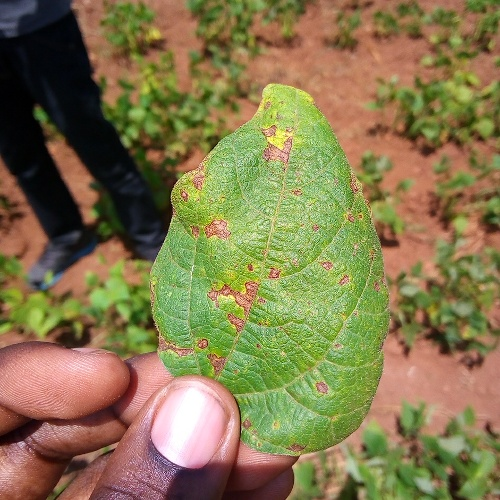

In [ ]:
image

### Loading data from local folders <a class="anchor" id="datasets-local"></a>

We can also load data from local folders, in these cases we simply use an empty string (`''`) as the dataset name.

In addition to being able to load from ImageNet style folder hierarchies, `create_dataset` also lets us extract from one or more tar archives; we can use this to avoid having to untar the archive! As an example, we can try this out on the Imagenette dataset.

Additionally, so far we have been loading raw images, so let's also use the `transform` argument to apply some transformations; here, we can quickly create some suitable transforms using the `create_transform` function

In [ ]:
from timm.data.transforms_factory import create_transform

In [ ]:
!ls imagenette/imagenette2-320

noisy_imagenette.csv  train  val


In [ ]:
ds = create_dataset(name='', root='imagenette/imagenette2-320', transform=create_transform(224))

In [ ]:
image, label = ds[0]

In [ ]:
label

0

In [ ]:
image.shape

torch.Size([3, 224, 224])

### `ImageDataset` Class <a class="anchor" id="imagedataset"></a>

TIMM `ImageDataset` is similar to `torchvision.datasets.ImageFolder`, but with some additional functionality. We can use this to load our decompressed imagenette dataset.

In [ ]:
from pathlib import Path

In [ ]:
from timm.data import ImageDataset

In [ ]:
!ls imagenette

imagenette2-320  imagenette2-320.tgz


In [ ]:
!ls imagenette/imagenette2-320/train

n01440764  n02979186  n03028079  n03417042  n03445777
n02102040  n03000684  n03394916  n03425413  n03888257


In [ ]:
import os
dir='imagenette/imagenette2-320/train'
os.listdir(dir)

['n03425413',
 'n03000684',
 'n03888257',
 'n02102040',
 'n03028079',
 'n02979186',
 'n01440764',
 'n03394916',
 'n03445777',
 'n03417042']

In [ ]:
classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
classes.sort()

In [ ]:
class_to_idx = {classes[i]: i for i in range(len(classes))}

In [ ]:
class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [ ]:
imagenette_ds = ImageDataset('imagenette/imagenette2-320/train')

In [ ]:
len(imagenette_ds)

9469

The key to `ImageDataset`'s flexibility is that the way it indexes and loads samples is abstracted into a `Parser` object.

Several parser are included with timm, including parsers to read images from folders, tar files and tensorflow datasets. The parser can be passed to the dataset as an argument, and we can access the parser directly.

In [ ]:
imagenette_ds

In [ ]:
image, label = imagenette_ds[0]

In [ ]:
label

0

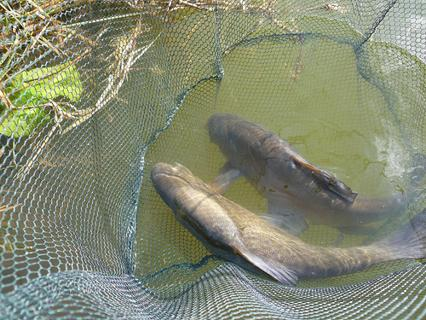

In [ ]:
image

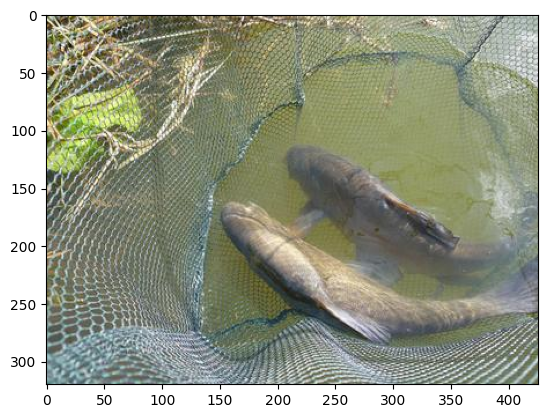

In [ ]:
from matplotlib import pyplot as plt

# visualize image
plt.imshow(imagenette_ds[0][0])

In [ ]:
from timm.data.loader import create_loader

try:
    # only works if gpu present on machine
    train_loader = create_loader(imagenette_ds, (3, 224, 224), 4)
except:
    train_loader = create_loader(imagenette_ds, (3, 224, 224), 4, use_prefetcher=False)

In [ ]:
image_batch, label_batch=next(iter(train_loader))

In [ ]:
image_batch.shape

torch.Size([4, 3, 224, 224])

In [ ]:
label_batch.shape

torch.Size([4])

timm has a class called PrefetchLoader. And by default, we use this prefetch loader to create our data loader. But, it only works on GPU enabled machines.

In [ ]:
imagenette_ds.parser

AttributeError: 'ImageDataset' object has no attribute 'parser'

In [ ]:
imagenette_ds.parser.class_to_idx

AttributeError: 'ImageDataset' object has no attribute 'parser'

We can see that this parser has converted the raw labels into integers, which can be fed to our model.

## TIMM

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

One of the most popular features of timm is its large, and ever-growing collection of model architectures. Many of these models contain pretrained weights - either trained natively in PyTorch, or ported from other libraries such as Jax and Tensorflow - which can be easily downloaded and used.

We can list, and query, the collection available models as demonstrated below:

In [ ]:
import timm
import torch

We can also use the pretrained argument to filter this selection to the models with pretrained weights:

In [ ]:
len(timm.list_models('*'))

1121

In [ ]:
model_names = timm.list_models(pretrained=True)
model_names

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

[this summary page](https://paperswithcode.com/lib/timm) by [Papers with code](https://paperswithcode.com/), which contains benchmarks and links to the original papers for many of the models included in timm.

We can list the different ResNet variants available by providing a wildcard string, which will be used as a filter based on the model names:

In [ ]:
timm.list_models('resnet*', pretrained=True)

['resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet26.bt_in1k',
 'resnet26d.bt_in1k',
 'resnet26t.ra2_in1k',
 'resnet32ts.ra2_in1k',
 'resnet33ts.ra2_in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'resnet50.a1_in1k',
 'resnet50.a1h_in1k',
 'resnet50.a2_in1k',
 'resnet50.a3_in1k',
 'resnet50.am_in1k',
 'resnet50.b1k_in1k',
 'resnet50.b2k_in1k',
 'resnet50.bt_in1k',
 'resnet50.c1_in1k',
 'resnet50.c2_in1k',
 'resnet50.d_in1k',
 'resnet50.fb_ssl_yfcc100m_ft_in1k',
 'resnet50.fb_swsl_ig1b_ft_in1k',
 'resnet50.gluon_in1k',
 'resnet50.ra_in1k',
 'resnet50.ram_in1k',
 'resnet50.tv2_in1k',
 'resnet50.tv_in1k',
 'resnet50_clip.openai',
 'resnet50_clip_gap.openai',
 'resnet50_gn.a1h_in

### Feedforward Image

The easiest way to create a model is by using `create_model`; a factory function that can be used to create any model in the timm library.

In [ ]:
m = timm.create_model('mobilenetv3_large_100', pretrained=True)
# m = timm.create_model('resnet50', pretrained=True)
# m = timm.create_model('resnest26d', pretrained=True)
m.eval() #The returned PyTorch model is set to train mode by default
x = torch.randn(1, 3, 224, 224)
features = m.forward_features(x)
print(features.shape)

torch.Size([1, 960, 7, 7])


In [ ]:
m.pretrained_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth',
 'hf_hub_id': 'timm/mobilenetv3_large_100.ra_in1k',
 'architecture': 'mobilenetv3_large_100',
 'tag': 'ra_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv_stem',
 'classifier': 'classifier'}

In [ ]:
m.pretrained_cfg['input_size']

(3, 224, 224)

In [ ]:
m.pretrained_cfg['num_classes']

1000

In [ ]:
data_cfg = timm.data.resolve_data_config(m.pretrained_cfg)
data_cfg

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

In [ ]:
transform = timm.data.create_transform(**data_cfg)
transform

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
from PIL import Image
import requests
img = Image.open(requests.get("https://raw.githubusercontent.com/pytorch/ios-demo-app/master/HelloWorld/HelloWorld/HelloWorld/image.png", stream=True).raw)

In [ ]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()
transform = timm.data.create_transform(**timm.data.resolve_data_config(model.pretrained_cfg))

In [ ]:
image_tensor = transform(img)
image_tensor.shape

torch.Size([3, 224, 224])

In [ ]:
newimage_tensor=image_tensor.unsqueeze(0)
newimage_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
output = model(image_tensor.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [ ]:
import torch
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([1000])

In [ ]:
values, indices = torch.topk(probabilities, 5)

In [ ]:
import requests
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

In [ ]:
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'timber_wolf, grey_wolf, gray_wolf, Canis_lupus',
  'value': 0.3217332661151886},
 {'label': 'white_wolf, Arctic_wolf, Canis_lupus_tundrarum',
  'value': 0.3082483410835266},
 {'label': 'Eskimo_dog, husky', 'value': 0.1427558809518814},
 {'label': 'Siberian_husky', 'value': 0.05468635633587837},
 {'label': 'malamute, malemute, Alaskan_malamute',
  'value': 0.025051163509488106}]

### Customizing models

Let's demonstrate this by creating a `Resnet-D` model, as introduced in the `Bag of Tricks for Image Classification For Convolutional Neural Networks` paper; which is a modification on the ResNet architecture that utilises an average pooling tweak for downsampling.

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)

model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

To help us understand more about how to use this model, we can access its config, which contains information such as the statistics that should be used to normalise the input data, the number of output classes and the name of the classification portion of the network.

In [ ]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

Pretrained Models for images with varying numbers of input channels

One less well known, but incredibly useful, feature of timm models is that they are able to work on input images with varying numbers of channels, which pose a problem for most other libraries; an excellent explanation of how this works is described [here](https://fastai.github.io/timmdocs/models#So-how-is-timm-able-to-load-these-weights?). Intuitively, timm does this by summing the weights of the initial convolutional layer for channels fewer than 3, or intelligently replicating these weights to the desired number of channels otherwise.

We can specify the number of channels for our input images by passing the `in_chans` argument to `create_model`.

In [ ]:
m = timm.create_model('resnet50d', pretrained=True, in_chans=1)

# single channel image
x = torch.randn(1, 1, 224, 224)

m(x).shape

torch.Size([1, 1000])

In addition to creating models with stock architectures, `create_model` also supports a number of arguments enabling us to customise a model for our task.

The arguments that are supported can depend on the underlying model architecture, with some arguments such as:

- `global_pool`: determine the type of global pooling to be used before the final classification layers

being model specific. In this case, it is dependent on whether the architecture employs a global pooling layer. Therefore, whilst we will be fine using this with a ResNet-like model, it wouldn't make sense to use it with [ViT](https://arxiv.org/abs/2010.11929v2), which doesn't use average pooling.

Whilst some arguments are model specific, arguments such as:

- `drop_rate`: set the dropout rate for training (Default: `0`)

- `num_classes`: the number of output neurons corresponding to classes can be used for almost all models.



Changing the number of classes

Examining the model config that we saw earlier, we can see that the name of the classification head for our network is fc. We can use this to access the corresponding module directly.

In [ ]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

However, this name is likely to change depending on the model architecture used. To provide a consistent interface for different models, timm models have the `get_classifier` method, which we can use to retrieve the classification head without having to lookup the module name.

In [ ]:
model.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

As expected, this returns the same linear layer as before.

As this model was pretrained on ImageNet, we can see that the final layer outputs 1000 classes. We can change this with the `num_classes` argument:

In [ ]:
timm.create_model('resnet50d', pretrained=True, num_classes=10).get_classifier()

Linear(in_features=2048, out_features=10, bias=True)

Inspecting the classifier, we can see that timm has replaced the final layer with a new, untrained, linear layer with the desired number of classes; ready to finetune on our dataset!

If we would like to avoid creating the last layer completely, we can set the number of classes equal to `0`, which will create a model with the identity function as the final layer; this can be useful for inspecting the output of penultimate layer.

In [ ]:
timm.create_model('resnet50d', pretrained=True, num_classes=0).get_classifier()

Identity()

### Global Pooling options

From our model's config, we can also see that the `pool_size` is set, informing us that a global pooling layer is used before the classifier. We can inspect this as follows:

In [ ]:
model.global_pool

SelectAdaptivePool2d(pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))

Here, we can see that this returns an instance of `SelectAdaptivePool2d`, which is a custom layer provided by timm, which supports different pooling and flattening configurations. At the time of writing, the supported pooling options are:
- `avg`: Average pooling
- `max`:  Max pooling
- `avgmax`: the sum of average and max pooling, re-scaled by 0.5
- `catavgmax`: a concatenation of the outputs of average and max pooling along feature dimension. Note that this will double the feature dimension.
- `''`: No pooling is used, the pooling layer is replaced by an Identity operation

We can visualise the output shapes of the different pooling options as demonstrated below

In [ ]:
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.randn(1, 3, 224, 224))
    print(feature_output.shape)


torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


### Modify the classifier and pooling layers

In [ ]:
m = timm.create_model('resnet50d', pretrained=True)

print(f'Original pooling: {m.global_pool}')
print(f'Original classifier: {m.get_classifier()}')
print('--------------------')

m.reset_classifier(10, 'max')

print(f'Modified pooling: {m.global_pool}')
print(f'Modified classifier: {m.get_classifier()}')


Original pooling: SelectAdaptivePool2d(pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
--------------------
Modified pooling: SelectAdaptivePool2d(pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Modified classifier: Linear(in_features=2048, out_features=10, bias=True)


When finetuning models on downstream tasks, using a slightly larger head can lead to increased performance. We can modify our ResNet model further: First, let's create our ResNet model as before, specifying that we would like 10 classes. As we are using a larger head, let's use `catavgmax` for our pooling, so that we provide more information as input to our classifier.

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')

In [ ]:
from torch import nn

From the existing classifier, we can get the number of input features:

In [ ]:
num_in_features = model.get_classifier().in_features; num_in_features

4096

Now, we can replace the final layer with our modified classification head by accessing the classifier directly. Here, the classfication head has been chosen somewhat arbitrarily.

In [ ]:
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=False),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False))

Testing the model with a dummy input, we get an output of the expected shape. Now, our modified model is ready to train!

In [ ]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape

torch.Size([1, 10])

### Feature Extraction

timm models also have consistent mechanisms for obtaining various types of intermediate features, which can be useful in order to use an architecture as a feature extractor for a downstream task; such as creating [feature pyramids in object detection](https://ieeexplore.ieee.org/document/8099589).

Let's visualise how this works by using an image from the [Oxford pets dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/).

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
image = Image.open(requests.get("https://raw.githubusercontent.com/pytorch/ios-demo-app/master/HelloWorld/HelloWorld/HelloWorld/image.png", stream=True).raw)

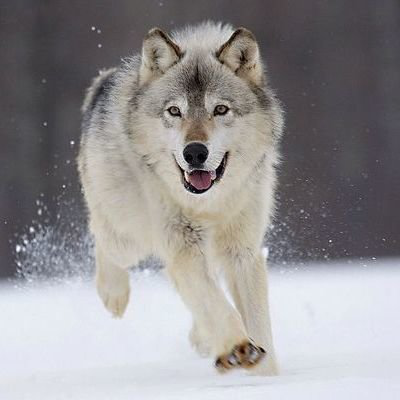

In [ ]:
image

We can convert this into a tensor, and transpose the channels into the format that PyTorch expects:

In [ ]:
image = torch.as_tensor(np.array(image, dtype=np.float32))
image.shape

torch.Size([400, 400, 3])

In [ ]:
image =image.transpose(2, 0)
image.shape

torch.Size([3, 400, 400])

In [ ]:
image =image[None]
image.shape

torch.Size([1, 3, 400, 400])

Let's try our ResNet-D model:

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)

In [ ]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

If we are only interested in the final feature map - that is the output of the final convolutional layer prior to pooling in this case - we can use the `forward_features` method to bypass the global pooling and classification layers.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
feature_output = model.forward_features(image)

We can visualise this below:

In [ ]:
def visualise_feature_output(t):
    plt.imshow(feature_output[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

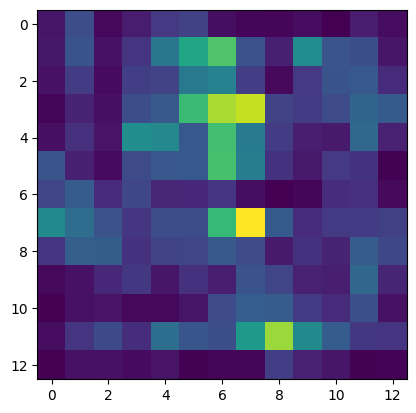

In [ ]:
visualise_feature_output(feature_output)

### Multiple feature outputs

Whilst the forward features method can be convenient for retrieving the final feature map, timm also provides functionality which enables us to use models as feature backbones that output feature maps for selected levels.

We can specify that we would like to use a model as a feature backbone by using the argument `features_only=True` when creating a model. By default, 5 strides will be output from most models (not all have that many), with the first starting at 2 (some start at 1 or 4).

The indices of the feature levels, and number of strides can be modified using the `out_indices` and `output_stride` arguments, as [demonstrated in the docs](https://rwightman.github.io/pytorch-image-models/feature_extraction/#multi-scale-feature-maps-feature-pyramid)

Let's see how this works with our ResNet-D model.

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, features_only=True)

As demonstrated below, we can get more information about the features that are returned, such as the specific module names, the reduction in features and the number of channels:

In [ ]:
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [ ]:
model.feature_info.reduction()

[2, 4, 8, 16, 32]

In [ ]:
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

Now, lets pass an image through our feature extractor and explore the output.

In [ ]:
out = model(image)

In [ ]:
len(out)

5

As expected, 5 feature maps have been returned. Inspecting the shape, we can see that the number of channels is consistent with what we expect:

In [ ]:
for o in out:
    print(o.shape)

torch.Size([1, 64, 200, 200])
torch.Size([1, 256, 100, 100])
torch.Size([1, 512, 50, 50])
torch.Size([1, 1024, 25, 25])
torch.Size([1, 2048, 13, 13])


Visualising each feature map, we can see that the image is gradually downsampled, as we would expect.

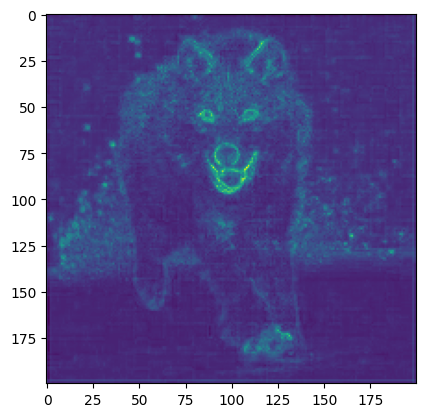

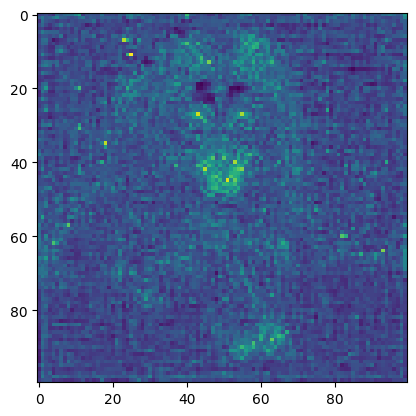

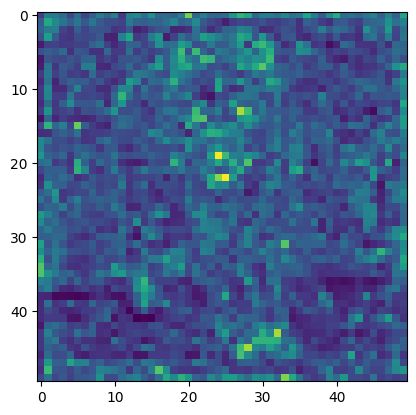

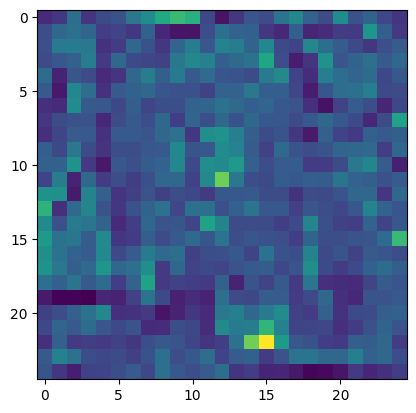

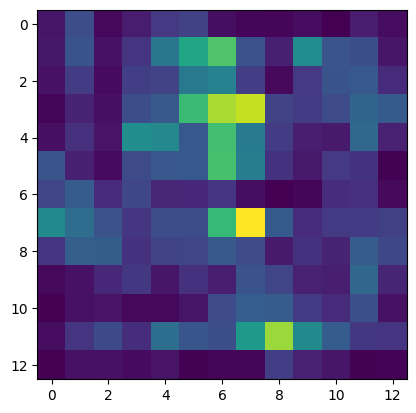

In [ ]:
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

### Using FX to access intermediate layers

[TorchVision](https://pytorch.org/vision/stable/index.html) recently released a new utility called FX, which makes it easier to access intermediate transformations of an input during the forward pass of a PyTorch Module. This is done by symbolically tracing the forward method to produce a graph where each node represents a single operation. As nodes are given human-readable names, it is easy specify exactly which nodes we want to access. FX is described in more detail [in the docs](https://pytorch.org/docs/stable/fx.html#module-torch.fx) and in [this blog post](https://pytorch.org/blog/FX-feature-extraction-torchvision/).

**Note**: At the time of writing, dynamic control flow can’t yet be represented in terms of a static graph when using FX.

As almost all models in timm are symbolically traceable, we can use FX to manipulate these. Let's explore how we can use FX to extract features from timm models.

First, let's import some helper methods from TorchVision:

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

Now, we recreate our ResNet-D model, with a classification head, and use the `exportable` argument to ensure that the model is traceable.

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, exportable=True)

Now, we can use the `get_graph_node_names` method to return the node names in order of execution. As the model is traced twice, in train and eval modes, both sets of node names are returned.

In [ ]:
nodes, _ = get_graph_node_names(model)

In [ ]:
nodes

['x',
 'conv1.0',
 'conv1.1',
 'conv1.2',
 'conv1.3',
 'conv1.4',
 'conv1.5',
 'conv1.6',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.drop_block',
 'layer1.0.act2',
 'layer1.0.aa',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.downsample.2',
 'layer1.0.add',
 'layer1.0.act3',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.drop_block',
 'layer1.1.act2',
 'layer1.1.aa',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.act3',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.act1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.drop_block',
 'layer1.2.act2',
 'layer1.2.aa',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.act3',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.drop_block',
 'layer2.0.act2',
 'layer2.0.aa'

Using FX, can use easily access the output from any node. Let's select the second activation in `layer1`.

In [ ]:
features = {'layer1.0.act2': 'out'}

Using `create_feature_extractor`, we can 'cut' the model at that point, as we can see below:

In [ ]:
feature_extractor = create_feature_extractor(model, return_nodes=features)

In [ ]:
feature_extractor

ResNet(
  (conv1): Module(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64,

Now, passing an image through our feature extractor this will return a dict of Tensors. We can then visualise this as before:

In [ ]:
out = feature_extractor(image)

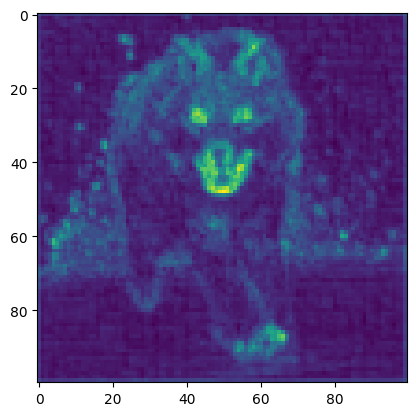

In [ ]:
plt.imshow(out['out'][0].transpose(0, 2).sum(-1).detach().numpy())

### Inference Test

In [ ]:
!pip install -q torchinfo

In [ ]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision not available.")

torch version: 2.3.1+cu121
torchvision version: 0.18.1+cu121


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.") #pip install -q torchinfo

In [ ]:
import timm
from timm.data import ImageDataset

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

In [ ]:
model.pretrained_cfg['input_size']

(3, 224, 224)

In [ ]:
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 10]             --                   True
├─Sequential (conv1)                     [32, 3, 224, 224]    [32, 64, 112, 112]   --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    └─BatchNorm2d (1)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (2)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (3)                        [32, 32, 112, 112]   [32, 32, 112, 112]   9,216                True
│    └─BatchNorm2d (4)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (5)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (6) 

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)

    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [ ]:
# Get a random list of image paths from test set
import random
from pathlib import Path
num_images_to_plot = 3
test_dir = "imagenette/imagenette2-320/val"
test_image_path_list = list(Path(test_dir).glob("*/*.JPEG")) # get list all image paths from test data

In [ ]:
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot


In [ ]:
test_image_path_sample

[PosixPath('imagenette/imagenette2-320/val/n03394916/n03394916_28971.JPEG'),
 PosixPath('imagenette/imagenette2-320/val/n02979186/n02979186_3161.JPEG'),
 PosixPath('imagenette/imagenette2-320/val/n03000684/n03000684_1082.JPEG')]

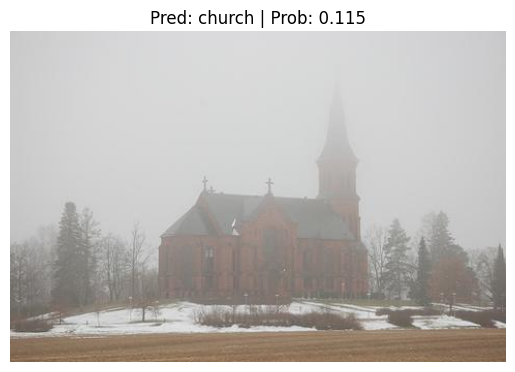

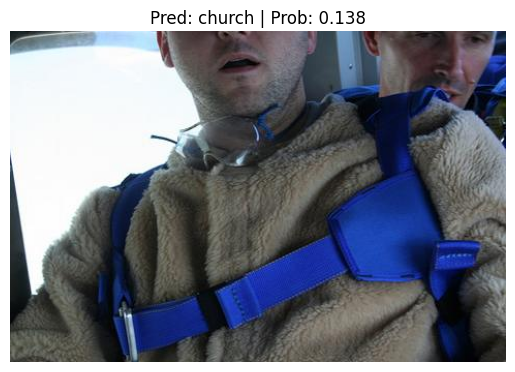

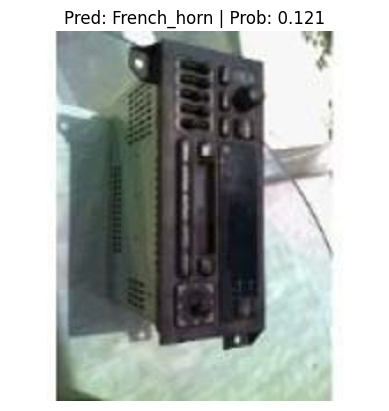

In [ ]:
# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

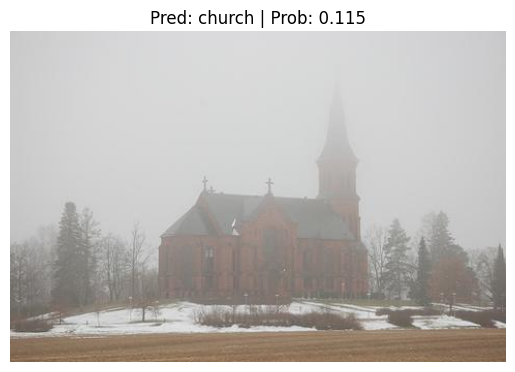

In [ ]:
# Predict on custom image
custom_image_path="imagenette/imagenette2-320/val/n03028079/n03028079_9220.JPEG"
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

In [ ]:
id_to_desc['n03028079']

'church'

## Train TIMM Model

### Prepare Dataset

In [ ]:
!ls imagenette/imagenette2-320/

noisy_imagenette.csv  train  val


In [ ]:
import timm
from timm.data import create_dataset

In [ ]:
from timm.data.transforms_factory import create_transform

In [ ]:
train_data = create_dataset(name='', root='imagenette/imagenette2-320/train', transform=create_transform(224))
test_data = create_dataset(name='', root='imagenette/imagenette2-320/val', transform=create_transform(224))

In [ ]:
import os
class_names = sorted(entry.name for entry in os.scandir('imagenette/imagenette2-320/train') if entry.is_dir())

In [ ]:
class_names

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

In [ ]:
#imagenette_train = ImageDataset('imagenette/imagenette2-320/train')
#imagenette_val = ImageDataset('imagenette/imagenette2-320/val')

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

batch_size = 16
num_workers=0

# Turn images into data loaders
train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,
)
test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True,
)

### Configure Model

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

In [ ]:
modulemodules=list(model.children())
modulemodules

[Sequential(
   (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
   (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (5): ReLU(inplace=True)
   (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 ),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (act1): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [ ]:
lastmodule=list(model.named_children())[-1] #get the last Sequential layer
lastmodule

('fc', Linear(in_features=2048, out_features=10, bias=True))

In [ ]:
model.fc.in_features

2048

In [ ]:
lastmodule[0] #name

'fc'

### Train model

In [ ]:
from torch import nn
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4607 | train_acc: 0.8627 | test_loss: 0.3899 | test_acc: 0.8760
Epoch: 2 | train_loss: 0.2358 | train_acc: 0.9291 | test_loss: 0.4486 | test_acc: 0.8709
Epoch: 3 | train_loss: 0.1724 | train_acc: 0.9452 | test_loss: 0.3331 | test_acc: 0.9055
Epoch: 4 | train_loss: 0.1325 | train_acc: 0.9575 | test_loss: 0.2670 | test_acc: 0.9195
Epoch: 5 | train_loss: 0.1174 | train_acc: 0.9629 | test_loss: 0.2959 | test_acc: 0.9116
[INFO] Total training time: 355.188 seconds


In [ ]:
#https://pytorch.org/tutorials/beginner/saving_loading_models.html
os.makedirs('data', exist_ok=True)
filename=os.path.join('data', 'modelcheckpoint.pth.tar')
torch.save(model.state_dict(), filename)

In [ ]:
import matplotlib.pyplot as plt
# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

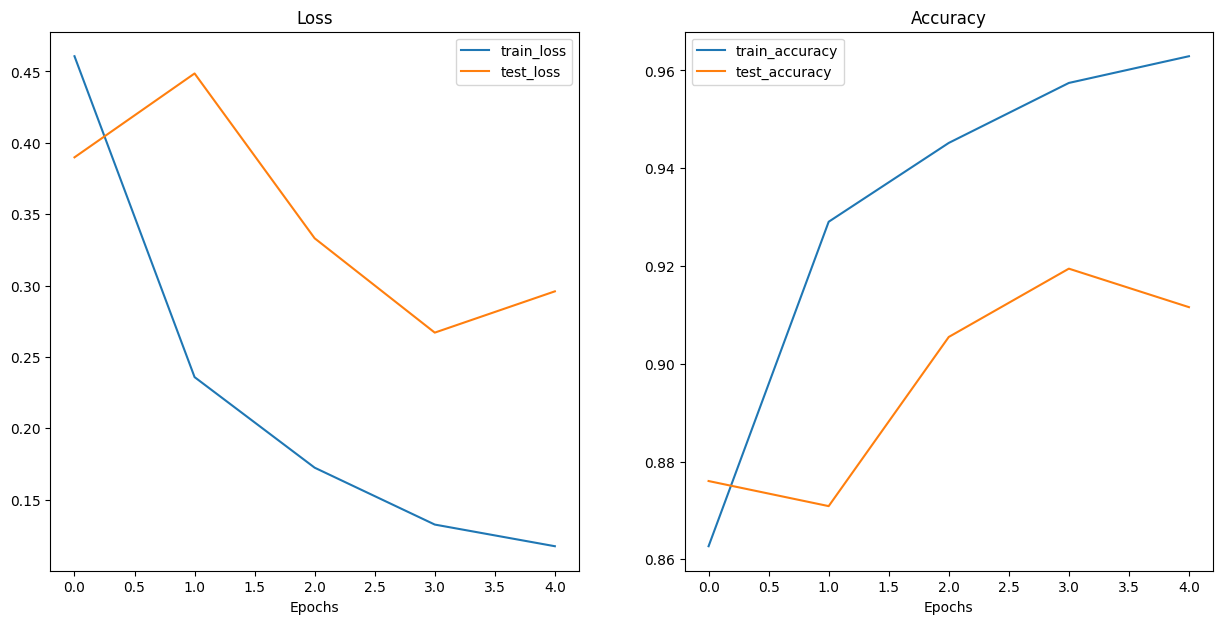

In [ ]:
plot_loss_curves(results)

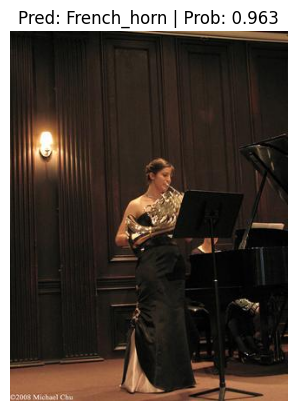

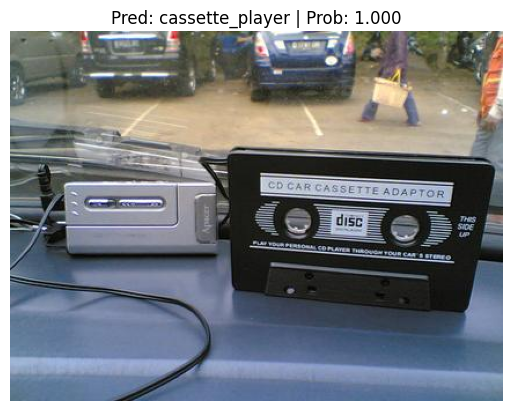

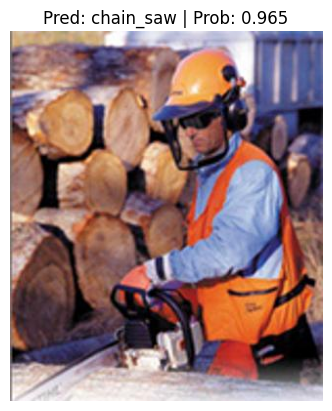

In [ ]:
# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

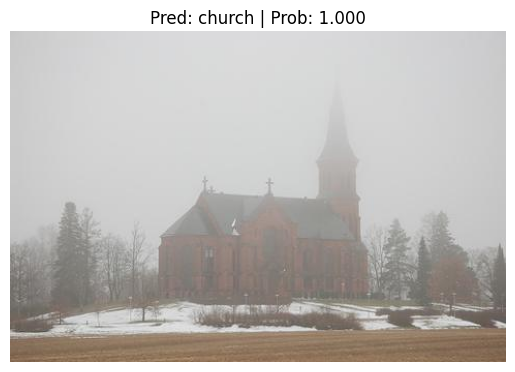

In [ ]:
# Predict on custom image
custom_image_path="imagenette/imagenette2-320/val/n03028079/n03028079_9220.JPEG"
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

In [ ]:
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [ ]:
id_to_desc['n03028079']

'church'

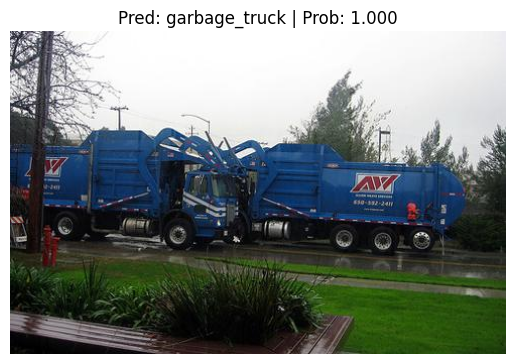

In [ ]:
# Predict on custom image
custom_image_path="imagenette/imagenette2-320/val/n03417042/n03417042_1000.JPEG"
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

In [ ]:
id_to_desc['n03417042']

'garbage_truck'

## Data Augmentation <a class="anchor" id="data-augmentation"></a>

In [15]:
from PIL import Image

timm includes lots of data augmentation transforms, which can be chained together to make augmentation pipelines; similarly to TorchVision, these pipelines expect a PIL image as an input.

The easiest way to get started is by using the `create_transform` factory function, let's explore how we can use this below.

In [16]:
from timm.data.transforms_factory import create_transform

In [17]:
create_transform(224,)

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [18]:
create_transform(224, is_training=True)

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

Here, we can see that this has created some basic augmentation pipeline including resizing, normalization and converting an image to a tensor. As we would expect, we can see that additional transformations, such as horizontal flipping and colour jitter, are included when we set `is_training=True`. The magnitude of these augmentations can be controlled with arguments such as ` hflip`, `vflip` and `color_jitter`.

We can also see that the method used to resize the image also varies depending on whether we are training. Whilst a standard `Resize` and `CenterCrop` are used during validation, during training, `RandomResizedCropAndInterpolation` is used, let's see what it does below. The implementation of this transform in timm also enables us to set different methods of image interpolation; here we are selecting that the interpolation is selected at random.

In [19]:
image = Image.open("imagenette/imagenette2-320/val/n03417042/n03417042_1000.JPEG")

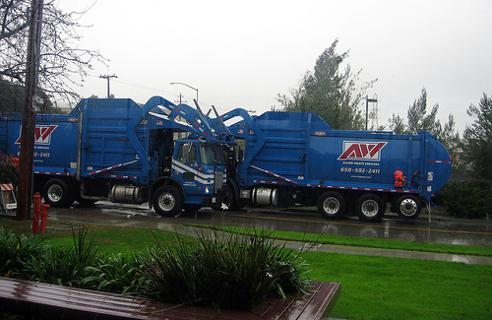

In [20]:
image

In [21]:
from timm.data.transforms import RandomResizedCropAndInterpolation

tfm = RandomResizedCropAndInterpolation(size=350, interpolation='random')

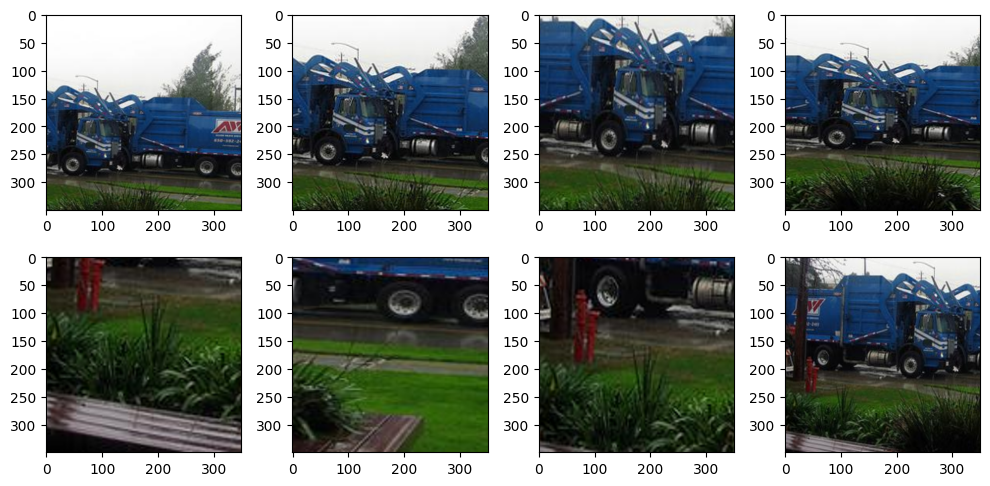

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

Running the transformation several times, we can observe that different crops have been taken of the image. Whilst this is beneficial during training, this may make the task harder during evaluation. Depending on the type of image, this type of transform may result in the subject of the picture being cropped out of the image; we can see an example of this if we look at the second image in the first row! Whilst this shouldn't be a huge problem if it occurs infrequently, we can avoid this by adjusting the scale parameter:

In [ ]:
tfm = RandomResizedCropAndInterpolation(size=224, scale=(0.8, 1))

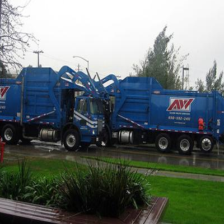

In [ ]:
tfm(image)

### RandAugment <a class="anchor" id="randaugment"></a>

When starting a new task, it can be difficult to know which augmentations to use, and in which order; with the amount of augmentations now available, the number of combinations is huge!

Often, a good place to start is by using an augmentation pipeline which has demonstrated good performance on other tasks. One such policy is RandAugment, is automated data augmentation method that uniformly samples operations from a set of augmentations - such as equalization, rotation, solarization, color jittering, posterizing, changing contrast, changing brightness, changing sharpness, shearing, and translations - and applies a number of these sequentially; for more info, see [the original paper] (https://arxiv.org/abs/1909.13719).

Now that we understand what RandAugment is, let's see how we can use it in an augmentation pipeline!

In timm, we define the parameters of our RandAugment policy by using a config string; which consists of multiple sections separated by dashes (`-`).

The first section defines the specific variant of rand augment (currently only `rand` is supported). The remaining sections, which can be placed in any order, are:

- **m** (*integer*): the magnitude of rand augment
- **n** (*integer*): the number of transform ops selected per image, this is optional with default = 2
- **mstd** (*float*): the standard deviation of the magnitude noise applied
- **mmax** (*integer*): sets the upper bound for magnitude to something other than the default of 10
- **w** (*integer*): the probability weight index (index of a set of weights to influence the choice of operation)
- **inc** (*bool - {0, 1}*): use augmentations that increase in severity with magnitude, this is optional with default = 0
   
    
For example:
- *'rand-m9-n3-mstd0.5'*: results in RandAugment with magnitude 9, 3 augmentations per image, magnitude_std 0.5
- *'rand-mstd1-w0'*: results in magnitude_std 1.0, weights 0, default magnitude *m* of 10, and 2 augmentations per image


Passing a config string to `create_transform`, we can see that this is handled by the `RandAugment` object, and we can see the names of all available ops:

In [65]:
create_transform(224, is_training=True, auto_augment='rand-m9-mstd0.5')

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tenso

We can also create this object for use in a custom pipeline by using the `rand_augment_transform` function, as demonstrated below:

In [66]:
from timm.data.auto_augment import rand_augment_transform

In [67]:
tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={'img_mean': (124, 116, 104)}
)

In [68]:
tfm

RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))

Let's apply this policy to an image to visualise some of the transformations.

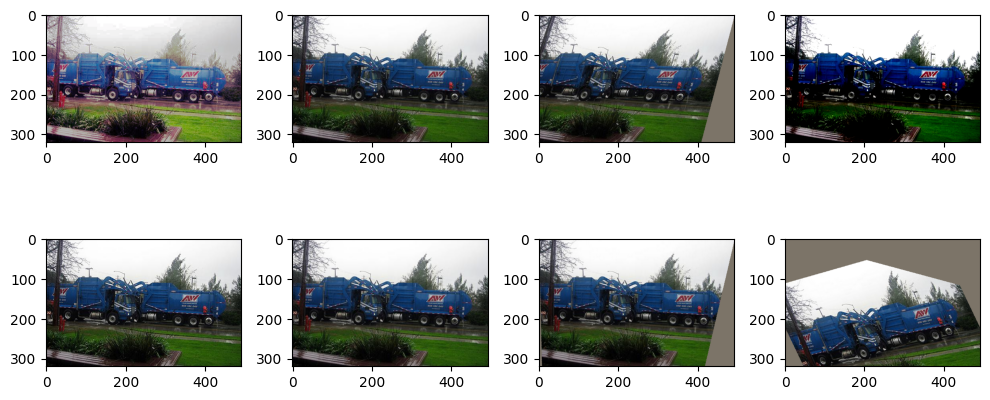

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

### CutMix and Mixup <a class="anchor" id="cutmix-mixup"></a>

timm provides a flexible implementation of the [CutMix](https://arxiv.org/abs/1905.04899) and [Mixup](https://arxiv.org/abs/1710.09412) augmentations, using the `Mixup` class; which handles both augmentations and provides the option of switching between them.

Using `Mixup`, we can select from variety of different mixing strategies:

- `batch`: CutMix vs Mixup selection, lambda, and CutMix region sampling are performed per batch
- `pair`: mixing, lambda, and region sampling are performed on sampled pairs within a batch
- `elem`: mixing, lambda, and region sampling are performed per image within batch
- `half`: the same as elementwise but one of each mixing pair is discarded so that each sample is seen once per epoch

Let's visualise how this works. To do this, we will need to create a DataLoader, iterate through it and apply the augmentations to the batch. Here, we shall use images from the Pets dataset.

Now, let's create our MixUp transform!

`Mixup` supports the following arguments:

- `mixup_alpha` (_float_): mixup alpha value, mixup is active if > 0., (default: 1)
- `cutmix_alpha` (_float_): cutmix alpha value, cutmix is active if > 0. (default: 0)
- `cutmix_minmax` (_List[float]_): cutmix min/max image ratio, cutmix is active and uses this vs alpha if not None.
- `prob` (_float_): the probability of applying mixup or cutmix per batch or element (default: 1)
- `switch_prob` (_float_): the probability of switching to cutmix instead of mixup when both are active (default: 0.5)
- `mode` (_str_): how to apply mixup/cutmix params (default: `batch`)
- `label_smoothing` (_float_): the amount of label smoothing to apply to the mixed target tensor (default: 0.1)
- `num_classes` (_int_): the number of classes for the target variable

Let's define a set of arguments so that we apply either mixup or cutmix to a batch of images, and alternate with the probability of 1, and use these to create our `Mixup` transformation:

In [25]:
from timm.data.mixup import Mixup

mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 1.,
    'prob': 1,
    'switch_prob': 0.5,
    'mode': 'batch',
    'label_smoothing': 0.1,
    'num_classes': 2}

mixup_fn = Mixup(**mixup_args)

In [29]:
mixup_fn

As mixup and cutmix take place on a batch of images, we can place the batch on the GPU before we apply the augmentation to speed things up! Here, we can see that mixup has been applied to this batch of images.

In [26]:
image_batch, label_batch = next(iter(train_dataloader))

In [30]:
image_batch, label_batch = mixup_fn(image_batch, label_batch)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


https://timm.fast.ai/mixup_cutmix

### Create dataloader

In [5]:
import timm
from timm.data import ImageDataset
from timm.data import create_dataset
from timm.data.transforms_factory import create_transform

In [6]:
train_data = create_dataset(name='', root='imagenette/imagenette2-320/train', transform=create_transform(224, is_training=True))
test_data = create_dataset(name='', root='imagenette/imagenette2-320/val', transform=create_transform(224))

In [7]:
from timm.data.loader import create_loader
batch_size=16
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)
input_size = model.pretrained_cfg['input_size']
try:
    # only works if gpu present on machine
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True)
except:
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True,use_prefetcher=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
try:
    # only works if gpu present on machine
    test_dataloader = create_loader(test_data, input_size, batch_size)
except:
    test_dataloader = create_loader(test_data, input_size, batch_size, use_prefetcher=False)

In [9]:
image_batch, label_batch = next(iter(train_dataloader))

In [10]:
label_batch

tensor([9, 4, 9, 4, 7, 1, 9, 5, 4, 6, 9, 6, 3, 3, 6, 5], device='cuda:0')

In [11]:
label_batch=label_batch.cpu().numpy()

In [12]:
image_batch.shape

torch.Size([16, 3, 224, 224])

In [13]:
images = image_batch.cpu().numpy() # convert images to numpy for display

In [14]:
print(images[1].shape)

(3, 224, 224)


In [20]:
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(inp, title=None, plotfig=True):
    """Imshow for Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0)) ## change to 224*224*3
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    if plotfig:
      plt.imshow(inp)
      if title is not None:
          plt.title(title)
      plt.pause(0.001)  # pause a bit so that plots are updated
    return inp

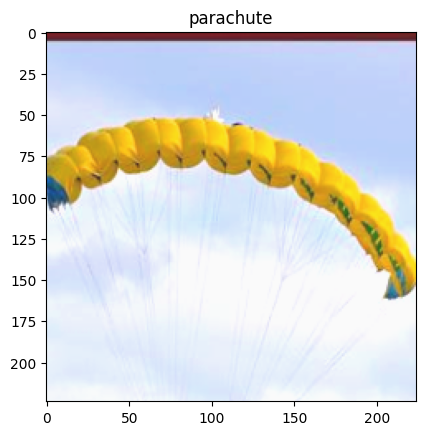

array([[[0.43137254, 0.15686274, 0.14901962],
        [0.43137254, 0.15686274, 0.14901962],
        [0.43137254, 0.15686274, 0.14901962],
        ...,
        [0.45490195, 0.15686274, 0.14117646],
        [0.45490195, 0.15686274, 0.14117646],
        [0.45098038, 0.15686274, 0.14117646]],

       [[0.45098038, 0.11764705, 0.13725491],
        [0.45098038, 0.11764705, 0.13725491],
        [0.45098038, 0.11764705, 0.13725491],
        ...,
        [0.43137254, 0.13725489, 0.13725491],
        [0.43137254, 0.13725489, 0.13725491],
        [0.43137254, 0.14117648, 0.13725491]],

       [[0.47058822, 0.13725489, 0.16470588],
        [0.47058822, 0.13725489, 0.16470588],
        [0.47058822, 0.13725489, 0.16470588],
        ...,
        [0.43921568, 0.16078432, 0.16078432],
        [0.43921568, 0.16078432, 0.16078432],
        [0.43529411, 0.16078432, 0.16078432]],

       ...,

       [[0.95686272, 0.96862749, 0.98039216],
        [0.95686272, 0.96862749, 0.98039216],
        [0.96078432, 0

In [23]:
imshow(image_batch[2], title=class_names[label_batch[0]], plotfig=True)

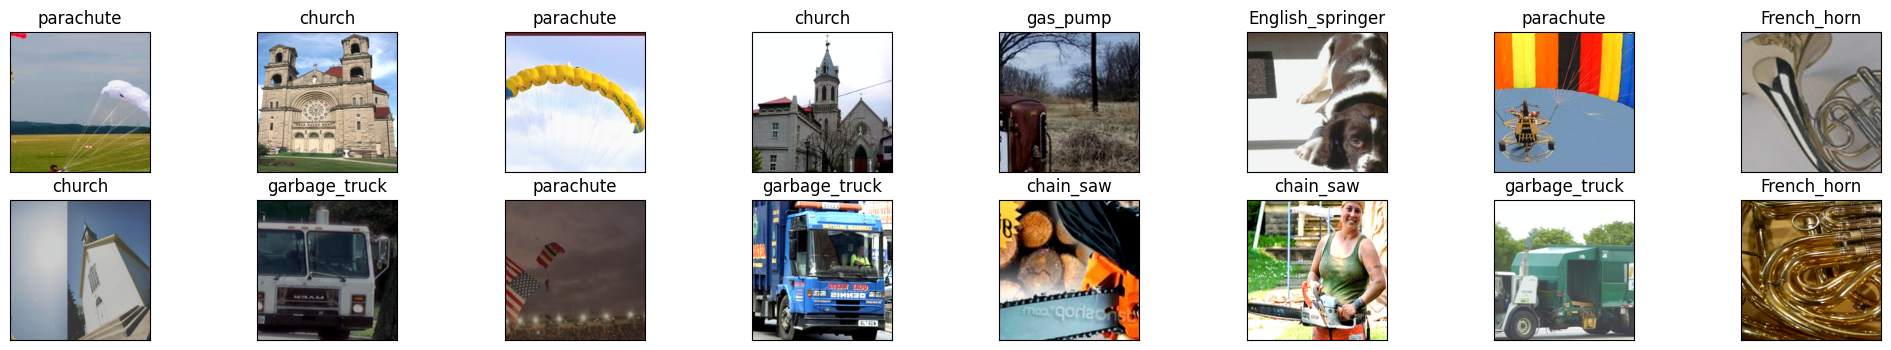

In [24]:
import numpy as np
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    inp=imshow(image_batch[idx], plotfig=False)
    #plt.imshow(np.transpose(images[idx], (1, 2, 0)))# change to 224*224*3
    plt.imshow(inp)
    #ax.set_title(class_names[idx])
    ax.set_title(class_names[label_batch[idx]])

In [52]:
for batch_idx, (input, target) in enumerate(test_dataloader):
    print(target)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Optimizers and Schedulers

### TIMM Optimizers

timm features a large number of optimizers, some of which are not available as part of PyTorch.

As well as making it easy to access familiar optimizers such as SGD, Adam and AdamW, some noteworthy inclusions are:

- `AdamP`: described [in this paper](https://arxiv.org/abs/2006.08217)
- `RMSPropTF`: an implementation of [RMSProp](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf) based on the original TensorFlow implementation, with other [small tweaks discussed here](https://github.com/pytorch/pytorch/issues/23796). In my experience, this often results in more stable training than the PyTorch version
- `LAMB`:  a pure pytorch variant of [FusedLAMB optimizer from Apex](https://nvidia.github.io/apex/optimizers.html#apex.optimizers.FusedLAMB), which is TPU compatible when using PyTorch XLA
- `AdaBelief`: described [in this paper](https://arxiv.org/abs/2010.07468). Guidance on setting the hyperparameters is available [here](https://github.com/juntang-zhuang/Adabelief-Optimizer#quick-guide)
- `MADGRAD`: described [in this paper](https://arxiv.org/abs/2101.11075)
- `AdaHessian`: an adaptive second order optimizer, described [in this paper](https://arxiv.org/abs/2006.00719)

The optimizers in timm support the same interface as those in `torch.optim`, and in most cases can simply be dropped in to a training script with no changes necessary.

In [7]:
import timm.optim

To see all of the optimizers that timm implements, we can inspect the timm.optim module.

In [32]:
import inspect

import timm.optim

[cls_name for cls_name, cls_obj in inspect.getmembers(timm.optim) if inspect.isclass(cls_obj) if cls_name !='Lookahead']


['AdaBelief',
 'Adafactor',
 'Adahessian',
 'AdamP',
 'AdamW',
 'Adan',
 'Lamb',
 'Lars',
 'Lion',
 'MADGRAD',
 'Nadam',
 'NvNovoGrad',
 'RAdam',
 'RMSpropTF',
 'SGDP']

The easiest way to create an optimizer is by using the `create_optimizer_v2` factory function, which expects the following:
- a model, or set of parameters
- the name of the optimizer
- any arguments to pass to the optimizer


We can use this function to create any of the optimizer implementations included from timm, as well as popular optimizers from torch.optim and the [fused optimizers](https://nvidia.github.io/apex/optimizers.html) from [Apex](https://nvidia.github.io/apex/index.html) (if installed).

Let's take a look at some examples.

In [33]:
import torch

In [34]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)

In [35]:
optimizer = timm.optim.create_optimizer_v2(model, opt='sgd', lr=0.01, momentum=0.8); optimizer, type(optimizer)

(SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0.8
     nesterov: True
     weight_decay: 0.0
 ),
 torch.optim.sgd.SGD)

Here, we can see that as timm does not contain an implementation of SGD, it has created our optimizer using the implementation from `torch.optim`.

Let's try creating one of the optimizers implemented in timm.

In [36]:
optimizer = timm.optim.create_optimizer_v2(model,
                                           opt='lamb',
                                           lr=0.01,
                                           weight_decay=0.01)

In [37]:
optimizer, type(optimizer)

(Lamb (
 Parameter Group 0
     always_adapt: False
     betas: (0.9, 0.999)
     bias_correction: True
     eps: 1e-06
     grad_averaging: True
     lr: 0.01
     max_grad_norm: 1.0
     trust_clip: False
     weight_decay: 0.0
 
 Parameter Group 1
     always_adapt: False
     betas: (0.9, 0.999)
     bias_correction: True
     eps: 1e-06
     grad_averaging: True
     lr: 0.01
     max_grad_norm: 1.0
     trust_clip: False
     weight_decay: 0.01
 ),
 timm.optim.lamb.Lamb)

We can verify that timm's implementation of `Lamb` has been used, and our weight decay has been applied to parameter group 1.

Creating optimizers manually: if we prefer not to use `create_optimizer_v2`, all of these optimizers can be created in the usual way.

In [38]:
optimizer = timm.optim.RMSpropTF(model.parameters(), lr=0.01)

In [39]:
optimizer

RMSpropTF (
Parameter Group 0
    alpha: 0.9
    centered: False
    decoupled_decay: False
    eps: 1e-10
    lr: 0.01
    lr_in_momentum: True
    momentum: 0.0
    weight_decay: 0
)

### TIMM Lookahead to an Optimizer

timm also enables us to apply the lookahead algorithm to an optimizer; introduced [here](https://arxiv.org/abs/1907.08610) and explained excellently [here](https://www.youtube.com/watch?v=TxGxiDK0Ccc). Lookahead may improve the learning stability and lowers the variance of its inner optimizer, with negligible computation and memory cost.

We can apply Lookahead to an optimizer by prefixing the optimizer name with `lookahead_`

In [40]:
optimizer = timm.optim.create_optimizer_v2(model.parameters(), opt='lookahead_adam', lr=0.01)

or wrapping by the optimizer instance in timm's Lookahead class

In [41]:
timm.optim.Lookahead(optimizer, alpha=0.5, k=6)

Lookahead (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lookahead_alpha: 0.5
    lookahead_k: 6
    lookahead_step: 0
    lr: 0.01
    maximize: False
    weight_decay: 0.0
)

When using Lookahead, we need to update our training script to include the following line, to update the slow weights.

In [ ]:
optimizer.sync_lookahead()

An example of how this can be used is demonstrated below

```
optimizer = timm.optim.AdamP(model.parameters(), lr=0.01)
optimizer = timm.optim.Lookahead(optimizer)

for epoch in num_epochs:
    for batch in training_dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_function(outputs, targets)

        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
    optimizer.sync_lookahead()
    
            
```
           

### Add optimizer to training

Now, we can use most of these optimizers as demonstrated below:

```
# replace
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# with
optimizer = timm.optim.AdamP(model.parameters(), lr=0.01)

for epoch in num_epochs:
    for batch in training_dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_function(outputs, targets)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
            
```
           

At the time of writing, the only exception to this is the second order `Adahessian` optimizer, which requires a small tweak when performing the `backward` step; similar tweaks are likely to be needed for additional second order optimizers which may be added in future.

This is demonstrated below.

```

optimizer = timm.optim.Adahessian(model.parameters(), lr=0.01)

is_second_order = hasattr(optimizer, 'is_second_order') and optimizer.is_second_order # True

for epoch in num_epochs:
    for batch in training_dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_function(outputs, targets)

        loss.backward(create_graph=second_order)
        optimizer.step()
        optimizer.zero_grad()
            
```
           

### Adjusting Learning rate schedules <a class="anchor" id="lr-cycles"></a>

timm contains the following schedulers:

- `StepLRScheduler`: the learning rate decays every _n_ steps; similar to `torch.optim.lr_scheduler.StepLR`
- `MultiStepLRScheduler`: a step scheduler that supports multiple milestones at which to reduce the learning rate; similar to `torch.optim.lr_scheduler.MultiStepLR`
- `PlateauLRScheduler`: reduces the learning rate by a specified factor each time a specified metric plateaus; similar to `torch.optim.lr_scheduler.ReduceLROnPlateau`
- `CosineLRScheduler`: cosine decay schedule with restarts, as described in [this paper](https://arxiv.org/abs/1608.03983); similar to `torch.optim.lr_scheduler.CosineAnnealingWarmRestarts`
- `TanhLRScheduler`: hyberbolic-tangent decay schedule with restarts, as described in [this paper](https://arxiv.org/abs/1806.01593)
- `PolyLRScheduler`: polynomial decay schedule, as described in [this paper](https://arxiv.org/abs/2004.05909)

To demonstrate some of the options that timm offers, let's explore some of the hyperparameters which are available, and how modifying these affects on the learning rate schedule.

Here, we shall focus on the `CosineLRScheduler`, as this is the scheduler used by default in timm's training scripts. However, as described above, features such as adding warmup and noise are present in all of the schedulers listed above.

So that we can visualise the learning rate schedule, let's define a function to create a model and optimizer to use with our scheduler. Note that, as we will only be updating the scheduler, the model is not actually being optimized, but we require an optimizer instance to work with our scheduler, and an optimizer requires a model.

#### Using the `CosineAnnealingWarmRestarts` scheduler from PyTorch

To illustrate timm's cosine scheduler differs from the one included in PyTorch, let's first look at how we would use the torch implementation of `CosineAnnealingWarmRestarts`.

This class supports the following parameters:

- `T_0` (_int_): Number of iterations for the first restart.
- `T_mult` (_int_): A factor that increases `T_{i}` after a restart. (Default: `1`)
- `eta_min` (_float_): Minimum learning rate. (Default: `0.`)
- `last_epoch` (_int_) – The index of last epoch. (Default: `-1`)

To set our schedule, we need to define the following: the number of epochs, the number of updates that take place per epoch, and - if we would like to enable restarts - the number of steps at which the learning rate should return to its initial value. As we are not using any data here, we can set these somewhat arbitrarily.

In [42]:
num_epochs=300
num_epoch_repeat = num_epochs//2
num_steps_per_epoch = 10

**Note**: Here, we have specified that we would like the learning rate to 'restart' halfway through the training run. This was selected primarily for visualisation purposes - so that we can understand what a restart looks like for this scheduler - as opposed to this being the recommended way to use this scheduler during a real training run.

Now, let's create our learning rate scheduler. As `T_0` requires the time until the first restart to be specified in terms of the number of iterations - where each iteration is a batch - we calculate this by multiplying the index of the epoch that we would like the restart to occur with the number of steps per epoch. Here, we are also specifying that the learning rate should never drop below `1e-6`.

In [43]:
#model, optimizer
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,
                                                                T_0=num_epoch_repeat*num_steps_per_epoch,
                                                                T_mult=1,
                                                                eta_min=1e-6,
                                                                last_epoch=-1)

Now, we can simulate using this scheduler in a training loop. As we are using the PyTorch implementation, we only need to call `step` after each optimizer update, which is once per batch. Here, we are recording the value of the learning rate after each step, so that we can visualise how the value of the learning rate was adjusted over the whole training run.

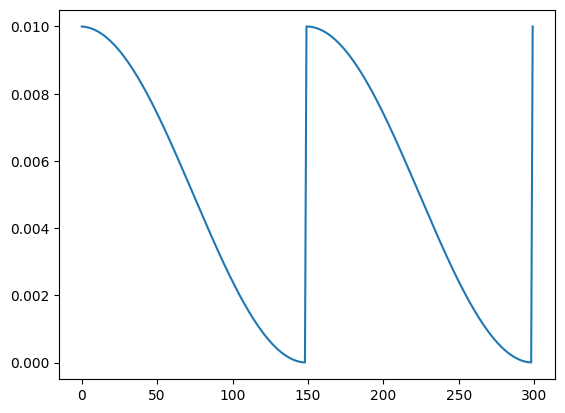

In [44]:
import matplotlib.pyplot as plt

lrs = []

for epoch in range(num_epochs):

    for i in range(num_steps_per_epoch):
        scheduler.step()

    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)

From this plot, we can see that the learning rate decayed until epoch 150, at which it was reset to its initial value before decaying again; just as we expected.

#### Using the `CosineLRScheduler` scheduler from timm

In [45]:
import timm.scheduler

Now that we understand how to use PyTorch's cosine scheduler, let's explore how this compares with the implementation included in timm, and the additional options that are offered. To begin, let's replicate the previous plot using timm's implementation of a cosine learning rate scheduler - `CosineLRScheduler`.

Some of arguments that we will need to do this are similar to those that we have seen before:
- `t_initial` (_int_): Number of iterations for the first restart, this is equivalent to `T_0` in torch's implementation
- `lr_min` (_float_): Minimum learning rate, this is equivalent to `eta_min` in torch's implementation (Default: `0.`)
- `cycle_mul` (_float_): A factor that increases `T_{i}` after a restart, this is equivalent to `T_mult` in torch's implementation (Default: `1`)

However, to observe behaviour consistent with Torch, we will also need to set:
- `cycle_limit` (_int_): Limit the number of restarts in a cycle (Default: `1`)
- `t_in_epochs` (_bool_): Whether the number iterations is given in terms of epochs rather than the number of batch updates (Default: `True`)

First, let's define the same schedule as before.

In [46]:
num_epochs=300
num_epoch_repeat = num_epochs/2
num_steps_per_epoch = 10

Now, we can create our scheduler instance. Here, we are expressing the number of iterations in terms of the number of update steps, and increasing the cycle limit to more than our desired number of restarts; so that the parameters are the same as we used with torch's implementation earlier.

In [47]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat*num_steps_per_epoch,
                                            lr_min=1e-6,
                                            cycle_limit=num_epoch_repeat+1,
                                            t_in_epochs=False)


Now, let's define a new function to simulate using a timm scheduler in a training run and record the updates to the learning rate.

In [48]:
def plot_lrs_for_timm_scheduler(scheduler):
    lrs = []

    for epoch in range(num_epochs):
        num_updates = epoch * num_steps_per_epoch

        for i in range(num_steps_per_epoch):
            num_updates += 1
            scheduler.step_update(num_updates=num_updates)

        scheduler.step(epoch + 1)

        lrs.append(optimizer.param_groups[0]["lr"])

    plt.plot(lrs)


We can now use this to plot our learning rate schedule!

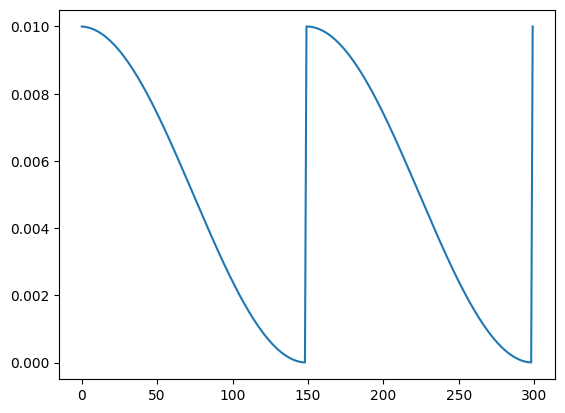

In [49]:
plot_lrs_for_timm_scheduler(scheduler)

As expected, our graph looks identical to the one we saw earlier.

Now that we have replicated the behaviour that we saw in torch, let's look at some of the additional features that timm offers in more detail.

Until now, we have expressed the number of iterations in terms of optimizer updates; which required us to calculate the number of iterations for the first repeat using `num_epoch_repeat * num_steps_per_epoch`. However, by specifying our iterations in terms of epochs - which is the default in timm - we can avoid having to do this calculation. Using the default setting, we can simply pass the index of the epoch at which we would like the first restart to occur, as demonstrated below.

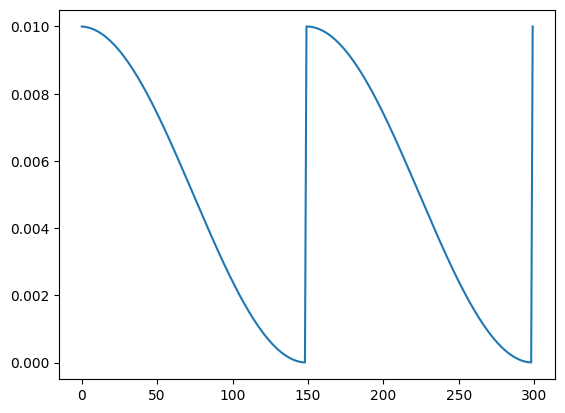

In [50]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-6,
                                            t_in_epochs=True,
                                            cycle_limit=num_epoch_repeat+1)

plot_lrs_for_timm_scheduler(scheduler)

We can see that our schedule is unchanged, we have just expressed our arguments slightly differently.

#### Adding Warm up and Noise

Another feature of all timm optimizers, is that they support adding warm up and noise to a learning rate schedule. We can specify the number of warm up epochs, and the initial learning rate to be used during the warm up, with the `warmup_t` and `warmup_lr_init` arguments. Let's see how our schedule changes if we specify that we would like 20 warm up epochs.

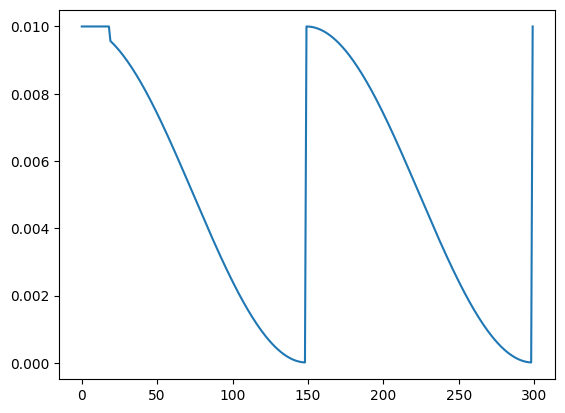

In [51]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            warmup_lr_init=0.01,
                                            warmup_t=20,
                                            cycle_limit=num_epoch_repeat+1
                                           )
plot_lrs_for_timm_scheduler(scheduler)

Here, we can see that this has resulted in a more gradual increase to our minimum learning rate, rather than starting at that point as we saw before.

We can also add noise to a range of epochs, using the `noise_range_t` and `noise_pct` arguments. Let's add a small amount of noise to the first 150 epochs:

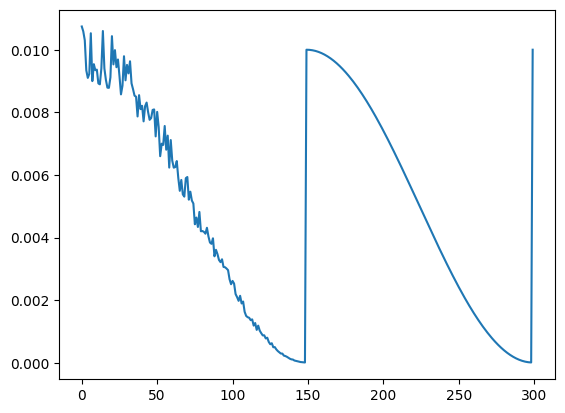

In [52]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            noise_range_t=(0, 150),
                                            noise_pct=0.1,
                                            cycle_limit=num_epoch_repeat+1
                                           )

plot_lrs_for_timm_scheduler(scheduler)

We can see that, up until epoch 150, the added noise affects our schedule so that learning rate does not decrease in a smooth curve. We can make this more extreme by increasing `noise_pct`.

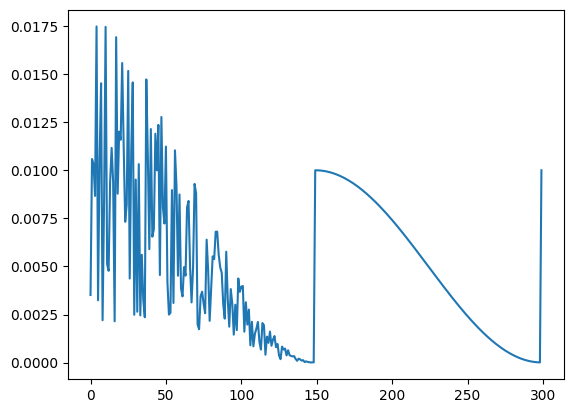

In [53]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            noise_range_t=(0, 150),
                                            noise_pct=0.8,
                                            cycle_limit=num_epoch_repeat+1
                                           )

plot_lrs_for_timm_scheduler(scheduler)

#### Additional options for `CosineLRScheduler`

Whilst warm up and noise can be used with any scheduler, there are some additional features which are specific to `CosineLRScheduler`. Let's explore how these affect our learning rate cycle.

We can use `cycle_mul`, to increase the time until the next restart, as seen below.

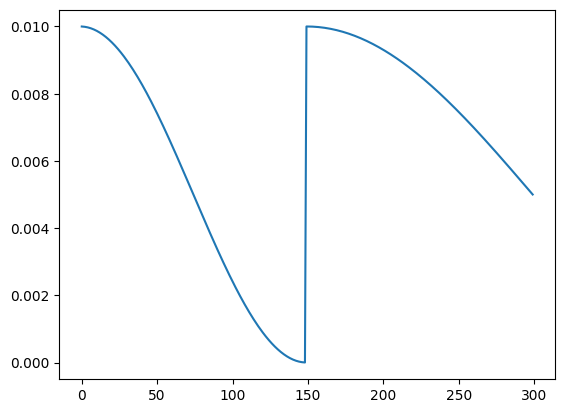

In [54]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat*num_steps_per_epoch,
                                            cycle_limit=num_epoch_repeat+1,
                                            cycle_mul=2.,
                                            t_in_epochs=False)
plot_lrs_for_timm_scheduler(scheduler)

Additionally, timm provides the option to limit the number of restarts with `cycle_limit`. By default, this is set to `1`, which results in the following schedule.

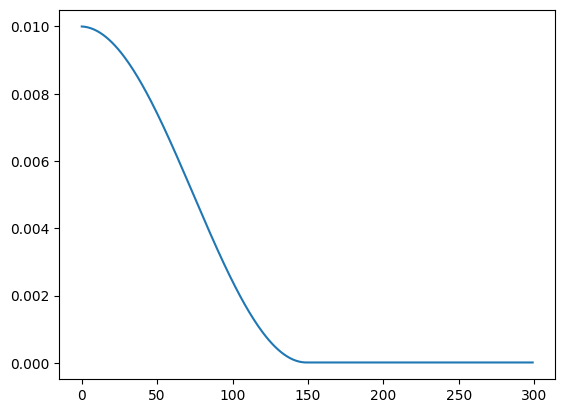

In [55]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            cycle_limit=1)


plot_lrs_for_timm_scheduler(scheduler)

`CosineLRScheduler` also supports different types of decay. We can use `cycle_decay` to reduce (or increase) the value of the learning rate that will be set during each successive restart.

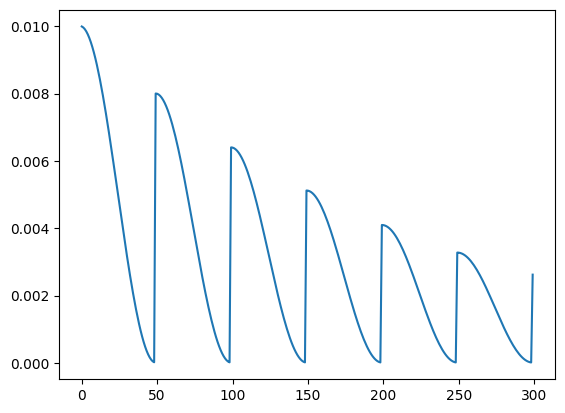

In [56]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=50,
                                            lr_min=1e-5,
                                            cycle_decay=0.8,
                                            cycle_limit=num_epoch_repeat+1
                                           )
plot_lrs_for_timm_scheduler(scheduler)

**Note**: here we have increased the frequency of the number of restarts to better illustrate the decay.

To control the curve itself, we can use the `k_decay` argument, for which the rate of change of the learning rate is changed by its k-th order derivative, as explained in [this paper](https://arxiv.org/abs/2004.05909).

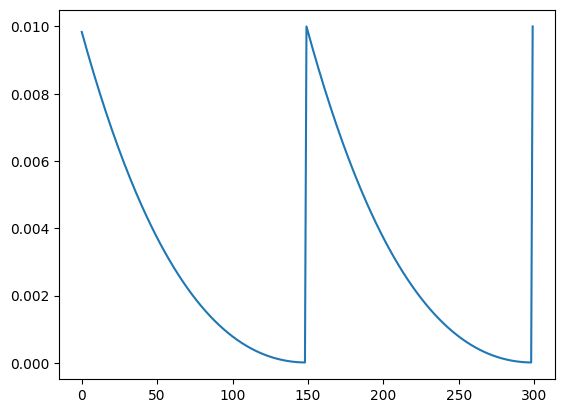

In [57]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            k_decay=0.5,
                                            cycle_limit=num_epoch_repeat+1
                                           )
plot_lrs_for_timm_scheduler(scheduler)

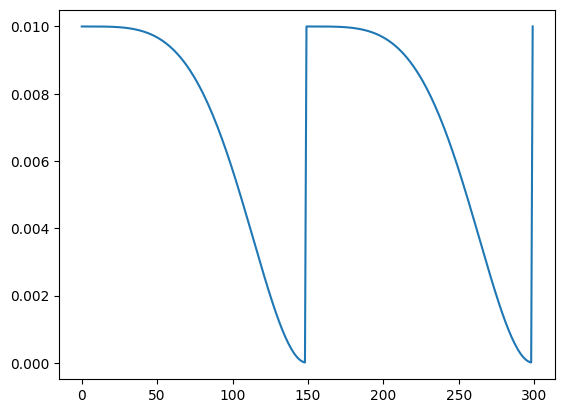

In [58]:
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            k_decay=2,
                                            cycle_limit=num_epoch_repeat+1
                                           )
plot_lrs_for_timm_scheduler(scheduler)

This option provides even more control over the annealing performed by this scheduler!

#### Default settings in timm's training script

If we set this scheduler using the default settings from timm's training script, we observe the following schedule.

**Note**: in the training script, training continues for an additional 10 epochs without further modifications to the learning rate as a 'cool down'.

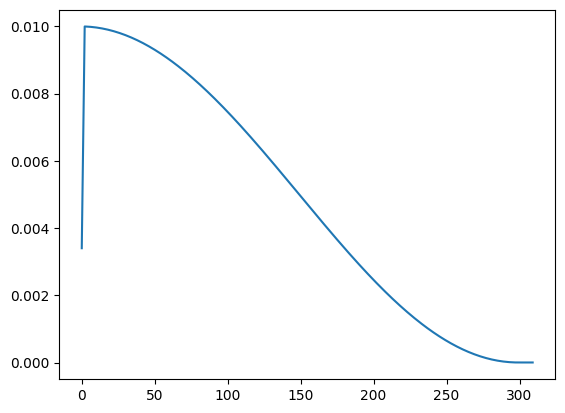

In [59]:
training_epochs=300
cooldown_epochs=10
num_epochs = training_epochs + cooldown_epochs
num_steps_per_epoch = 10

lr_sched = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=training_epochs,
                                            cycle_decay=0.5,
                                            lr_min=1e-6,
                                            t_in_epochs=True,
                                            warmup_t=3,
                                            warmup_lr_init=1e-4,
                                            cycle_limit=1,
                                           )

plot_lrs_for_timm_scheduler(lr_sched)

As we can see, there are no restarts at all with the default settings!

#### Other Learning rate schedulers

Whilst my favourite of the schedulers included with timm is `CosineLRScheduler`, it may be helpful to visualise the schedules of some of the other schedulers, that have no counterpart in PyTorch. Both of these schedulers are similar to the cosine scheduler in the sense that the learning rate is reset after a specified number epochs - assuming a cycle limit is not set - but the annealing is done slightly differently.

For the `TanhLRScheduler`, annealing is performed using the hyperbolic-tangent function, as demonstrated below.

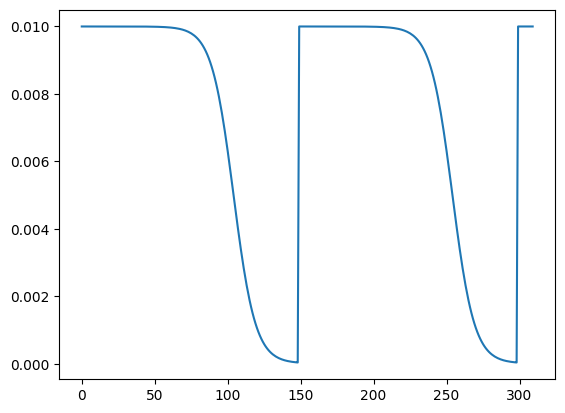

In [60]:
scheduler = timm.scheduler.TanhLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            cycle_limit=num_epoch_repeat+1,
                                           )
plot_lrs_for_timm_scheduler(scheduler)

timm also provides `PolyLRScheduler`, which uses a polynomial decay:

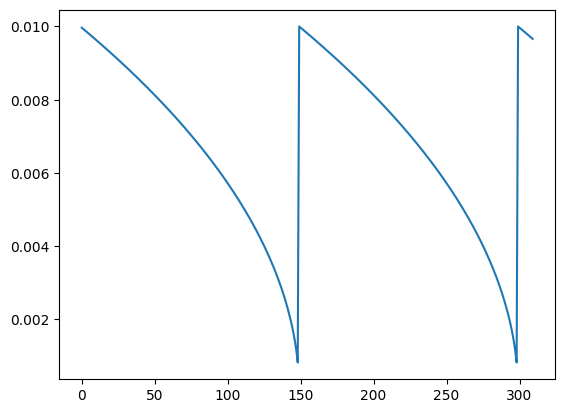

In [61]:
lr_sched = timm.scheduler.PolyLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            cycle_limit=num_epoch_repeat+1,
                                           )
plot_lrs_for_timm_scheduler(lr_sched)

Similarly to `CosineLRScheduler`, the `PolyLRScheduler` scheduler also supports the `k_decay` argument, as demonstrated below:

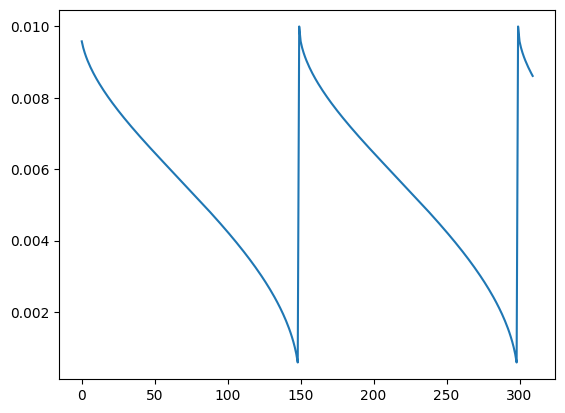

In [62]:
lr_sched = timm.scheduler.PolyLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            cycle_limit=num_epoch_repeat+1,
                                            k_decay=0.5
                                           )
plot_lrs_for_timm_scheduler(lr_sched)

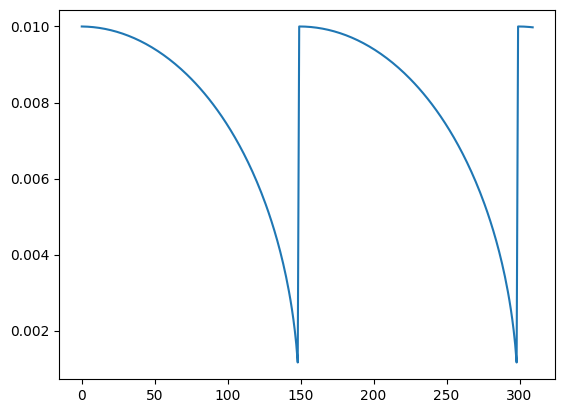

In [63]:
lr_sched = timm.scheduler.PolyLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            cycle_limit=num_epoch_repeat+1,
                                            k_decay=2
                                           )
plot_lrs_for_timm_scheduler(lr_sched)

### Add scheduler to training

Unlike the the schedulers included in PyTorch, it is good practice to update timm schedulers twice per epoch:

- the `.step_update` method should be called **after each optimizer update**, with the index of the next update; this where we would call `.step` for a PyTorch scheduler
- the `.step` method should be called **at the end of each epoch**, with the index of the next epoch

By explicitly providing the number of updates and the epoch indices, this enables the timm schedulers to remove the confusing `last_epoch` and `-1` behaviour observed in PyTorch schedulers.

An example of how we can use a timm scheduler is presented below:

```
training_epochs = 300
cooldown_epochs = 10
num_epochs = training_epochs + cooldown_epochs

optimizer = timm.optim.AdamP(my_model.parameters(), lr=0.01)
scheduler = timm.scheduler.CosineLRScheduler(optimizer, t_initial=training_epochs)

for epoch in range(num_epochs):

    num_steps_per_epoch = len(train_dataloader)
    num_updates = epoch * num_steps_per_epoch

    for batch in training_dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_function(outputs, targets)

        loss.backward()
        optimizer.step()
        scheduler.step_update(num_updates=num_updates)

        optimizer.zero_grad()

    scheduler.step(epoch + 1)
            
```
           

## Apply new data augmentation, optimizers and schedulers in Training

### Create Model and Dataloader with Augmentation

In [113]:
import timm
from timm.data import ImageDataset
from timm.data import create_dataset
from timm.data.transforms_factory import create_transform

In [114]:
train_data = create_dataset(name='', root='imagenette/imagenette2-320/train', transform=create_transform(224, is_training=True, auto_augment='rand-m9-mstd0.5'))
test_data = create_dataset(name='', root='imagenette/imagenette2-320/val', transform=create_transform(224))

In [115]:
from timm.data.loader import create_loader
batch_size=16
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)
input_size = model.pretrained_cfg['input_size']
try:
    # only works if gpu present on machine
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True)
except:
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True,use_prefetcher=False)

In [116]:
try:
    # only works if gpu present on machine
    test_dataloader = create_loader(test_data, input_size, batch_size)
except:
    test_dataloader = create_loader(test_data, input_size, batch_size, use_prefetcher=False)

In [68]:
image_batch, label_batch = next(iter(train_dataloader))

In [79]:
!pip install -q torchinfo

In [117]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.") #pip install -q torchinfo

summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 10]             --                   True
├─Sequential (conv1)                     [32, 3, 224, 224]    [32, 64, 112, 112]   --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    └─BatchNorm2d (1)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (2)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (3)                        [32, 32, 112, 112]   [32, 32, 112, 112]   9,216                True
│    └─BatchNorm2d (4)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (5)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (6) 

In [89]:
# for param in model.parameters():
#     param.requires_grad = False

In [90]:
# for param in model.fc.parameters():
#     param.requires_grad = True

### Create Optimizer, loss function, and scheduler

In [118]:
import timm.optim

In [119]:
# replace
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# with
optimizer = timm.optim.AdamP(model.parameters(), lr=0.01)
# optimizer = timm.optim.create_optimizer_v2(model,
#                                            opt='lamb',
#                                            lr=0.01,
#                                            weight_decay=0.01)

In [120]:
num_epochs=20
num_epoch_repeat = num_epochs//2
#num_steps_per_epoch = 10

In [121]:
from torch import nn
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [122]:
import timm.scheduler

In [123]:
# get num_steps_per_epoch

num_steps_per_epoch = len(train_dataloader)


In [124]:
#torch
# scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,
#                                                                 T_0=num_epoch_repeat*num_steps_per_epoch,
#                                                                 T_mult=1,
#                                                                 eta_min=1e-6,
#                                                                 last_epoch=-1)
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            warmup_lr_init=0.01,
                                            warmup_t=3,
                                            cycle_limit=num_epoch_repeat+1
                                           )
# plot_lrs_for_timm_scheduler(scheduler)

### Training script

In [128]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import torch
from torch import nn
# def train_step(model: torch.nn.Module,
#                dataloader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                device: torch.device,
#                epoch: int,
#                scheduler: Any) -> Tuple[float, float]:
def train_stepnew(model, dataloader, loss_fn, optimizer, device, epoch, scheduler):
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    num_steps_per_epoch = len(dataloader)
    num_updates = epoch * num_steps_per_epoch

    lrs = []

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        #new added for timm
        if scheduler is not None:
          num_updates += 1
          scheduler.step_update(num_updates=num_updates)
          lrs.append(optimizer.param_groups[0]["lr"])

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc, lrs

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

# def train(model: torch.nn.Module,
#           train_dataloader: torch.utils.data.DataLoader,
#           test_dataloader: torch.utils.data.DataLoader,
#           optimizer: torch.optim.Optimizer,
#           loss_fn: torch.nn.Module,
#           epochs: int,
#           device: torch.device) -> Dict[str, List]:
def trainnew(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs, device, scheduler):
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [],
               "all_lrs": []}

    # Loop through training and testing steps for a number of epochs

    # Make sure model on target device
    model.to(device)

    all_lrs=[]

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # train_loss, train_acc = train_step(model=model,
        #                                   dataloader=train_dataloader,
        #                                   loss_fn=loss_fn,
        #                                   optimizer=optimizer,
        #                                   device=device)
        train_loss, train_acc, lrs = train_stepnew(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device,
                                          epoch=epoch,
                                          scheduler=scheduler)

        if scheduler is not None:
          all_lrs.extend(lrs)
          scheduler.step(epoch + 1)

        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        results["all_lrs"].append(all_lrs)

    # Return the filled results at the end of the epochs
    return results

In [129]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [130]:

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
# results = train(model=model,
#                        train_dataloader=train_dataloader,
#                        test_dataloader=test_dataloader,
#                        optimizer=optimizer,
#                        loss_fn=loss_fn,
#                        epochs=num_epochs,
#                        device=device)
results = trainnew(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=num_epochs,
                       device=device,
                       scheduler=scheduler)
# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3433 | train_acc: 0.1342 | test_loss: 7.6525 | test_acc: 0.1113
Epoch: 2 | train_loss: 2.1474 | train_acc: 0.2162 | test_loss: 2.3593 | test_acc: 0.1745
Epoch: 3 | train_loss: 2.0063 | train_acc: 0.2848 | test_loss: 1.9199 | test_acc: 0.3056
Epoch: 4 | train_loss: 1.8750 | train_acc: 0.3402 | test_loss: 2.0669 | test_acc: 0.3239
Epoch: 5 | train_loss: 1.7683 | train_acc: 0.3981 | test_loss: 1.6771 | test_acc: 0.4139
Epoch: 6 | train_loss: 1.6767 | train_acc: 0.4299 | test_loss: 1.4138 | test_acc: 0.5396
Epoch: 7 | train_loss: 1.5424 | train_acc: 0.4828 | test_loss: 1.3168 | test_acc: 0.5760
Epoch: 8 | train_loss: 1.4037 | train_acc: 0.5380 | test_loss: 1.1823 | test_acc: 0.6275
Epoch: 9 | train_loss: 1.2792 | train_acc: 0.5774 | test_loss: 0.9892 | test_acc: 0.6852
Epoch: 10 | train_loss: 1.1705 | train_acc: 0.6184 | test_loss: 0.8980 | test_acc: 0.7175
Epoch: 11 | train_loss: 1.6435 | train_acc: 0.4460 | test_loss: 1.4554 | test_acc: 0.5274
Epoch: 12 | train_l

In [133]:
import matplotlib.pyplot as plt
# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

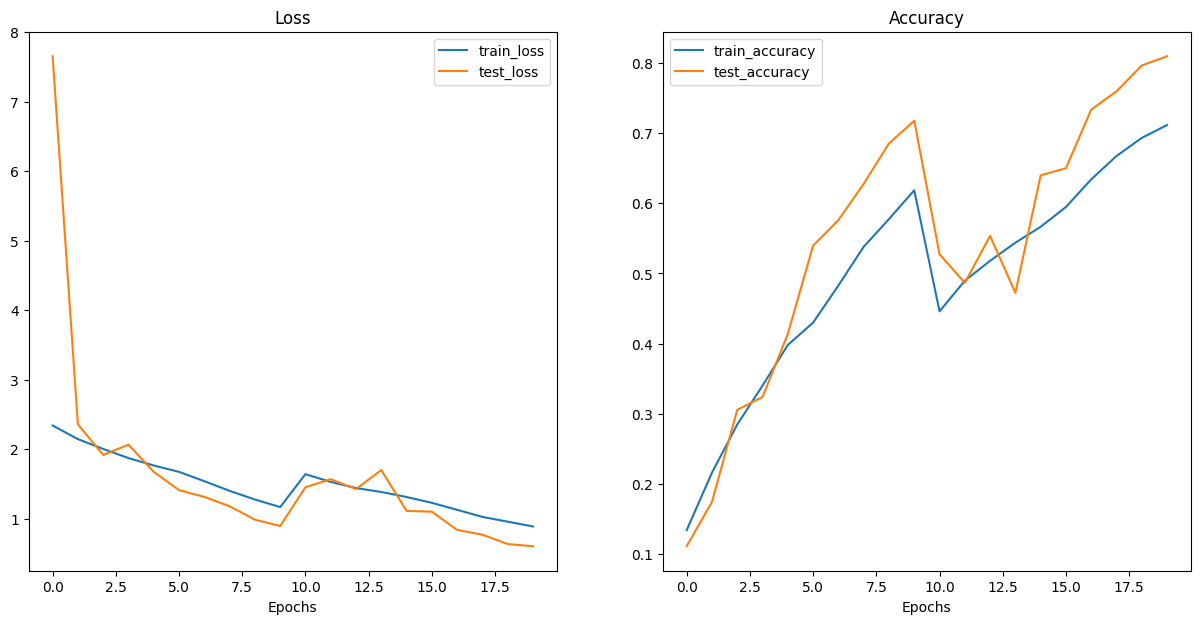

In [134]:
plot_loss_curves(results)

In [137]:
len(results["all_lrs"])

20

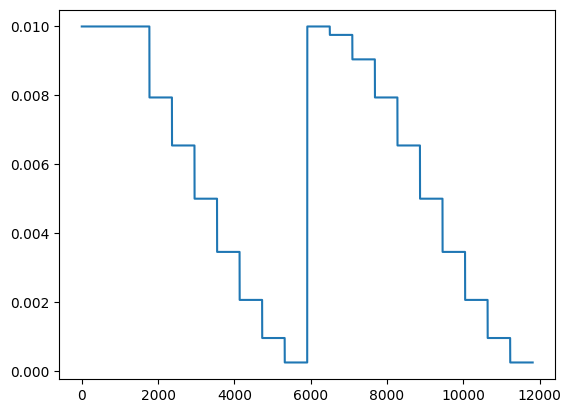

In [139]:
plt.plot(results["all_lrs"][0])

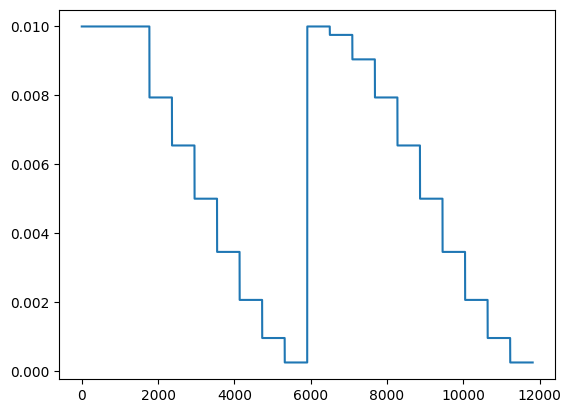

In [140]:
plt.plot(results["all_lrs"][5])

## Exponential Moving Average Model <a class="anchor" id="ema-model"></a>

When training a model, it can be beneficial to set the values for the model weights by taking a moving average of the parameters that were observed across the entire training run, as opposed to using the parameters obtained after the last incremental update. In practice, this is often done by maintaining an *EMA model*, which is a copy of the model that we are training. However, rather than updating all of the parameters of this model after every update step, we set these parameters using a linear combination of the existing parameter values and the updated values. This is done using the following formula:

*updated_EMA_model_weights* =  _decay_ * _EMA_model_weights_ + (1. - _decay_) * _updated_model_weights_

where the _decay_ is a parameter that we set. For example, if we set `decay=0.99`, we have:

*updated_EMA_model_weights* =  0.99 * _EMA_model_weights_ + 0.01 * _updated_model_weights_

which we can see is keeping 99% of the existing state and only 1% of the new state!

To understand why this may be beneficial, let's consider the case that our model, in an early stage of training, performs exceptionally poorly on a batch of data. This may result in a large update update to our parameters, overcompensating for the high loss obtained, which will be detrimental for the upcoming batches. By only incorporating only a small percentage of the latest parameters, large updates will be 'smoothed', and have less of an overall impact on the model's weights.

Sometimes, these averaged parameters can sometimes produce significantly better results during evaluation, and this technique has been employed in several training schemes for popular models such as training MNASNet, MobileNet-V3 and EfficientNet; using the [implementation included in TensorFlow](https://www.tensorflow.org/api_docs/python/tf/train/ExponentialMovingAverage). Using the `ModelEmaV2` module implemented in timm, we can replicate this behaviour, and apply the same practice to our own training scripts.

The implementation of `ModelEmaV2` expects the following arguments:

- `model`: the subclass of `nn.Module` that we are training. This is the model that will be updated in our training loop as normal
-`decay` (_float_): the amount of decay to use, which determines how much of the previous state will be maintained. The Tensorflow documentation suggests that reasonable values for decay are close to 1.0, typically in the multiple-nines range: 0.999, 0.9999, etc. (Default: `0.9999`)
- `device`: the device that should be used to evaluate the EMA model. If this is not set, the EMA model will be created on the same device that is being used for the model.


In [141]:
ema_model = timm.utils.ModelEmaV2(
            model, decay=0.9
        )

To update the parameters of the EMA model, we need to call `.update` after each parameter update.

In [142]:
ema_model.update(model)

In [143]:
image_batch, label_batch = next(iter(train_dataloader))

In [144]:
outputs = model(image_batch)

In [145]:
outputs.shape

torch.Size([16, 10])

As the EMA model has different parameters to the one being trained, we must evaluate this separately.

In [146]:
ema_model_outputs = ema_model.module(image_batch)
ema_model_outputs.shape

torch.Size([16, 10])

In [147]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()

In [148]:
validation_loss = loss_fn(outputs, label_batch)
validation_loss

tensor(0.5339, device='cuda:0', grad_fn=<NllLossBackward0>)

In [149]:
ema_model_validation_loss = loss_fn(ema_model_outputs, label_batch)
ema_model_validation_loss

tensor(0.5339, device='cuda:0', grad_fn=<NllLossBackward0>)

### Training

In [150]:
import timm
from timm.data import ImageDataset
from timm.data import create_dataset
from timm.data.transforms_factory import create_transform
from pathlib import Path
import os
import pandas as pd

In [151]:
data_path='imagenette/imagenette2-320'

In [157]:
def get_dataset(data_path, mapidfile='map_clsloc.txt', use_autoaugment=False):
  data_path = Path(data_path)
  train_path = data_path / "train"
  val_path = data_path / "val"
  #option1
  #num_classes = len(list(train_path.iterdir()))
  #option2
  classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
  classes.sort()
  num_classes=len(classes)
  if mapidfile is not None:
    df = pd.read_csv(mapidfile, delimiter=' ', header=None, names=['WordNetID','ID', 'description'])
    # use the WordNetID as the key
    id_to_desc = dict(zip(df['WordNetID'], df['description']))
    class_names = [id_to_desc[class_name] for class_name in classes]
  else:
    class_names = classes
  if use_autoaugment:
    train_data = create_dataset(name='', root='imagenette/imagenette2-320/train', transform=create_transform(224, is_training=True, auto_augment='rand-m9-mstd0.5'))
  else:
    train_data = create_dataset(name='', root='imagenette/imagenette2-320/train', transform=create_transform(224, is_training=True))
  test_data = create_dataset(name='', root='imagenette/imagenette2-320/val', transform=create_transform(224))
  return train_data, test_data, num_classes, class_names

In [158]:
train_data, test_data, num_classes, class_names = get_dataset(data_path, mapidfile='map_clsloc.txt', use_autoaugment=False)

In [160]:
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [159]:
num_classes

10

In [161]:
from timm.data.loader import create_loader
batch_size=16
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)
input_size = model.pretrained_cfg['input_size']
try:
    # only works if gpu present on machine
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True)
except:
    train_dataloader = create_loader(train_data, input_size, batch_size, is_training=True,use_prefetcher=False)

In [162]:
try:
    # only works if gpu present on machine
    test_dataloader = create_loader(test_data, input_size, batch_size)
except:
    test_dataloader = create_loader(test_data, input_size, batch_size, use_prefetcher=False)

In [163]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.") #pip install -q torchinfo

summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 10]             --                   True
├─Sequential (conv1)                     [32, 3, 224, 224]    [32, 64, 112, 112]   --                   True
│    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    └─BatchNorm2d (1)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (2)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (3)                        [32, 32, 112, 112]   [32, 32, 112, 112]   9,216                True
│    └─BatchNorm2d (4)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    └─ReLU (5)                          [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Conv2d (6) 

In [164]:
optimizer = timm.optim.AdamP(model.parameters(), lr=0.01)
# optimizer = timm.optim.create_optimizer_v2(model,
#                                            opt='lamb',
#                                            lr=0.01,
#                                            weight_decay=0.01)

In [165]:
from torch import nn
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [166]:
# scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,
#                                                                 T_0=num_epoch_repeat*num_steps_per_epoch,
#                                                                 T_mult=1,
#                                                                 eta_min=1e-6,
#                                                                 last_epoch=-1)
scheduler = timm.scheduler.CosineLRScheduler(optimizer,
                                            t_initial=num_epoch_repeat,
                                            lr_min=1e-5,
                                            warmup_lr_init=0.01,
                                            warmup_t=3,
                                            cycle_limit=num_epoch_repeat+1
                                           )

In [167]:
num_epochs=20
num_epoch_repeat = num_epochs//2

In [171]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import torch
from torch import nn

def train_stepnew(model, dataloader, loss_fn, optimizer, device, epoch, scheduler, ema_model):
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    num_steps_per_epoch = len(dataloader)
    num_updates = epoch * num_steps_per_epoch

    lrs = []

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # 6. Update EMA model parameters
        if ema_model is not None:
          ema_model.update(model)

        #new added for timm
        if scheduler is not None:
          num_updates += 1
          scheduler.step_update(num_updates=num_updates)
          lrs.append(optimizer.param_groups[0]["lr"])

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc, lrs, ema_model

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def trainnew(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs, device, scheduler, use_ema=False):
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary


    # Loop through training and testing steps for a number of epochs

    # Make sure model on target device
    model.to(device)

    if use_ema:
      ema_model = timm.utils.ModelEmaV2(
              model, decay=0.9
          )
      results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [],
               "ematest_loss": [],
               "ematest_acc": [],
               "all_lrs": []}
    else:
      ema_model = None
      results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": [],
               "all_lrs": []}

    all_lrs=[]

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # train_loss, train_acc = train_step(model=model,
        #                                   dataloader=train_dataloader,
        #                                   loss_fn=loss_fn,
        #                                   optimizer=optimizer,
        #                                   device=device)
        train_loss, train_acc, lrs, ema_model = train_stepnew(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device,
                                          epoch=epoch,
                                          scheduler=scheduler,
                                          ema_model=ema_model)

        if scheduler is not None:
          all_lrs.extend(lrs)
          scheduler.step(epoch + 1)

        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)
        if ema_model is not None:
          ematest_loss, ematest_acc = test_step(model=ema_model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        if ema_model is not None:
          results["ematest_loss"].append(ematest_loss)
          results["ematest_acc"].append(ematest_acc)
        results["all_lrs"].append(all_lrs)

    # Return the filled results at the end of the epochs
    return results, ema_model

In [169]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [173]:

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results, ema_model = trainnew(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=num_epochs,
                       device=device,
                       scheduler=scheduler,
                       use_ema = True)
# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3613 | train_acc: 0.1258 | test_loss: 2.6069 | test_acc: 0.1197
Epoch: 2 | train_loss: 2.1834 | train_acc: 0.1929 | test_loss: 2.1449 | test_acc: 0.2210
Epoch: 3 | train_loss: 2.1104 | train_acc: 0.2373 | test_loss: 2.2885 | test_acc: 0.2630
Epoch: 4 | train_loss: 1.9057 | train_acc: 0.3330 | test_loss: 1.9660 | test_acc: 0.3575
Epoch: 5 | train_loss: 1.6991 | train_acc: 0.4172 | test_loss: 1.9846 | test_acc: 0.4263
Epoch: 6 | train_loss: 1.5649 | train_acc: 0.4693 | test_loss: 1.3982 | test_acc: 0.5373
Epoch: 7 | train_loss: 1.4293 | train_acc: 0.5223 | test_loss: 1.3207 | test_acc: 0.5894
Epoch: 8 | train_loss: 1.3075 | train_acc: 0.5707 | test_loss: 1.0222 | test_acc: 0.6692
Epoch: 9 | train_loss: 1.1817 | train_acc: 0.6106 | test_loss: 0.8707 | test_acc: 0.7147
Epoch: 10 | train_loss: 1.0851 | train_acc: 0.6493 | test_loss: 0.7932 | test_acc: 0.7406
Epoch: 11 | train_loss: 1.5848 | train_acc: 0.4718 | test_loss: 1.3150 | test_acc: 0.5650
Epoch: 12 | train_l

### Evaluation and Compare

In [177]:
import matplotlib.pyplot as plt
# Plot loss curves of a model
def plot_loss_curvesema(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["test_loss"]
    test_loss = results["ematest_loss"]

    accuracy = results["test_acc"]
    test_accuracy = results["ematest_acc"]

    epochs = range(len(results["test_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="test_loss")
    plt.plot(epochs, test_loss, label="ematest_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="test_accuracy")
    plt.plot(epochs, test_accuracy, label="ematest_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

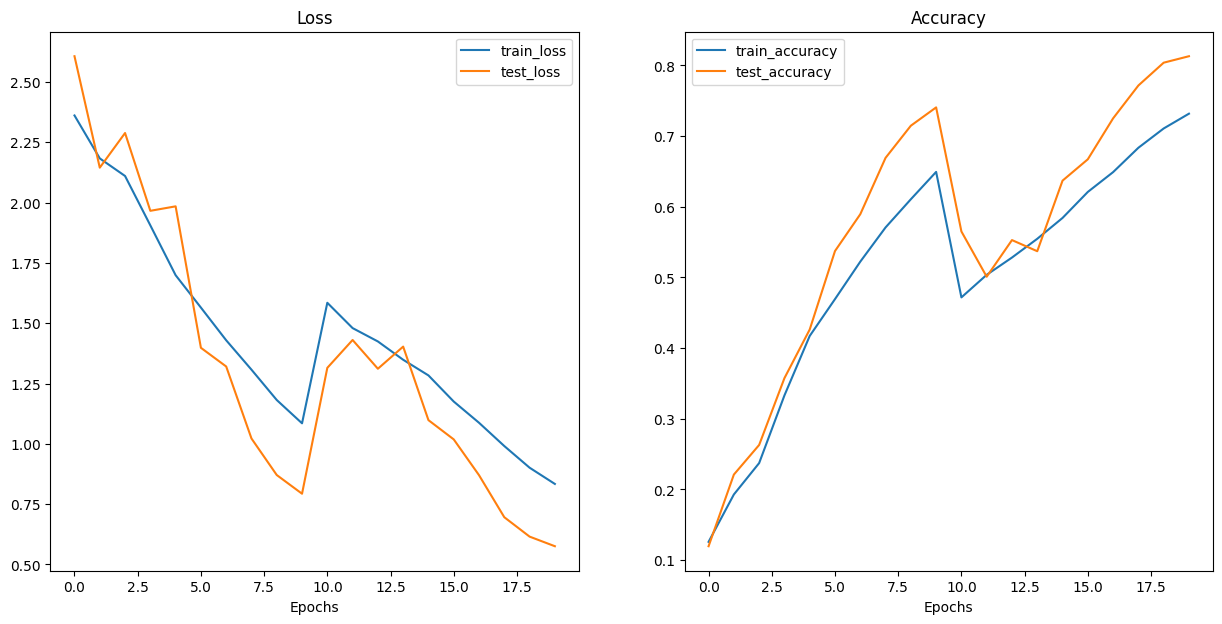

In [174]:
plot_loss_curves(results)

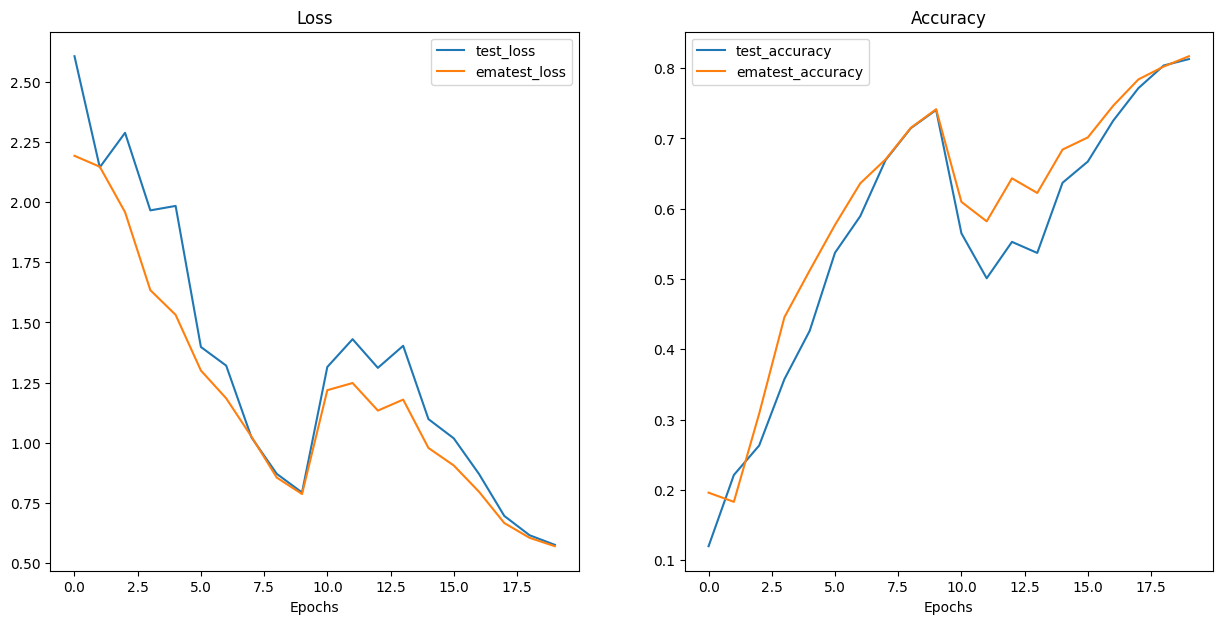

In [178]:
plot_loss_curvesema(results)